<a href="https://colab.research.google.com/github/manparodi/ProyectoEFEMA/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns #Graficos de outliers
import matplotlib.pyplot as plt
import statsmodels.api as sm #correlacion
from plotnine import * #ggplot
import statistics as stats
import plotly as px
import scipy as sc
from scipy.stats import pearsonr
from statsmodels.graphics.gofplots import qqplot
import altair as alt
from scipy.stats import pointbiserialr
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import csv

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving proyectoData (1).csv to proyectoData (1).csv
Saving Data Externa.xlsx to Data Externa.xlsx


In [ ]:
df = pd.read_csv("proyectoData (1).csv")
df_ext = pd.read_excel("Data Externa.xlsx")

In [ ]:
df

,Unnamed: 0,Unidad.de.Negocio,RUBRO,Supervisor,Origen,Anio,Mes,Cantidad
0,1,_ Celulares,Celulares,Distribucion,Importado,2019,1,27
1,2,_ Celulares,Celulares,Distribucion,Local,2019,1,99
2,3,_ Celulares,Celulares,Distribucion,Local,2019,2,615
3,4,_ Celulares,Celulares,Distribucion,Local,2019,3,381
4,5,_ Celulares,Celulares,Distribucion,Local,2019,4,304
...,...,...,...,...,...,...,...,...
2699,2700,IT Accesorios,Television,Distribucion,Importado,2023,2,150
2700,2701,IT Accesorios,Television,Distribucion,Importado,2023,3,477
2701,2702,IT Accesorios,Television,Online,Importado,2022,6,1
2702,2703,IT Accesorios,Television,Online,Importado,2022,8,1


In [ ]:
df_ext=df_ext.drop(["idmes"],axis=1)
df_ext=df_ext.drop(["Mundial"],axis=1)

In [ ]:
df=df.drop(["Unnamed: 0"],axis=1)
df=df.rename(columns={"Supervisor":"Canal"})

In [ ]:
df_combinaciones = df.groupby(['Unidad.de.Negocio', 'RUBRO','Canal', 'Origen']).size().reset_index()
df_combinaciones = df_combinaciones.rename(columns={0: 'Registros'})
df_combinaciones=df_combinaciones.drop(["Registros"],axis=1)
df_combinaciones

,Unidad.de.Negocio,RUBRO,Canal,Origen
0,Componentes,Almacenamiento,Distribucion,Importado
1,Componentes,Almacenamiento,Distribucion,Local
2,Componentes,Almacenamiento,Online,Importado
3,Componentes,Almacenamiento,Online,Local
4,Componentes,Gabinetes,Distribucion,Fábrica
...,...,...,...,...
114,_ Varios,Proyectores,Online,Local
115,_ Varios,Scanners,Distribucion,Importado
116,_ Varios,Scanners,Online,Local
117,_ Varios,UPS y Estabilizadores,Distribucion,Local


In [ ]:
df_fecha = df.groupby(['Anio','Mes']).size().reset_index()
df_fecha = df_fecha.rename(columns={0: 'Registros'})
df_fecha=df_fecha.drop(["Registros"],axis=1)

In [ ]:
df_fecha

,Anio,Mes
0,2019,1
1,2019,2
2,2019,3
3,2019,4
4,2019,5
5,2019,6
6,2019,7
7,2019,8
8,2019,9
9,2019,10


In [ ]:
df_combinaciones['key'] = 1
df_fecha['key'] = 1
df1 = pd.merge(df_combinaciones, df_fecha,on='key')

In [ ]:
df1=df1.drop(['key'],axis=1)
#df1

In [ ]:
df_final = pd.merge(df1, df.drop_duplicates(keep='first'), how='outer')

df_final['Cantidad'] = df_final['Cantidad'].fillna(0)

In [ ]:
df_final = df_final.rename(columns={'Anio': 'Año'})
df_final = pd.merge(df_final, df_ext, on=['Mes', 'Año'], how='left')
df_final['Origen'] = df_final['Origen'].replace('local', 'Local')
df_final = df_final.drop(df_final[(df_final["Mes"] == 1) & (df_final["Año"] == 2019)].index)
df_final = df_final.drop(df_final[(df_final["Mes"] == 4) & (df_final["Año"] == 2023)].index)
df_final['Fecha'] = pd.to_datetime(df_final['Año'].astype(str) + '-' + df_final['Mes'].astype(str) + '-01')

In [ ]:
df_final[(df_final['RUBRO'] == 'Notebooks') & (df_final['Origen'] == 'Fábrica')]


,Unidad.de.Negocio,RUBRO,Canal,Origen,Año,Mes,Cantidad,Inflacion_1,Inflacion_2,Inflacion_3,Indice_Consumidor_1,Indice_Consumidor_2,Indice_Consumidor_3,Aislamiento,Dias_Evento,Fecha
2653,Gfast,Notebooks,Distribucion,Fábrica,2019,2,0.0,0.029,0.026,0.032,33.101078,35.990000,32.100000,0,0,2019-02-01
2654,Gfast,Notebooks,Distribucion,Fábrica,2019,3,0.0,0.038,0.029,0.026,36.039967,33.101078,35.990000,0,0,2019-03-01
2655,Gfast,Notebooks,Distribucion,Fábrica,2019,4,0.0,0.047,0.038,0.029,34.794621,36.039967,33.101078,0,0,2019-04-01
2656,Gfast,Notebooks,Distribucion,Fábrica,2019,5,0.0,0.034,0.047,0.038,34.411144,34.794621,36.039967,0,3,2019-05-01
2657,Gfast,Notebooks,Distribucion,Fábrica,2019,6,0.0,0.031,0.034,0.047,36.472500,34.411144,34.794621,0,0,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2802,Gfast,Notebooks,Online,Fábrica,2022,11,43.0,0.063,0.062,0.070,35.650000,37.189381,37.046005,0,3,2022-11-01
2803,Gfast,Notebooks,Online,Fábrica,2022,12,20.0,0.049,0.063,0.062,35.150000,35.650000,37.189381,0,0,2022-12-01
2804,Gfast,Notebooks,Online,Fábrica,2023,1,272.0,0.051,0.049,0.063,35.910000,35.150000,35.650000,0,0,2023-01-01
2805,Gfast,Notebooks,Online,Fábrica,2023,2,198.0,0.060,0.051,0.049,38.520000,35.910000,35.150000,0,0,2023-02-01


In [ ]:
df_final

,Unidad.de.Negocio,RUBRO,Canal,Origen,Año,Mes,Cantidad,Inflacion_1,Inflacion_2,Inflacion_3,Indice_Consumidor_1,Indice_Consumidor_2,Indice_Consumidor_3,Aislamiento,Dias_Evento,Fecha
1,Componentes,Almacenamiento,Distribucion,Importado,2019,2,22.0,0.029,0.026,0.032,33.101078,35.990000,32.100000,0,0,2019-02-01
2,Componentes,Almacenamiento,Distribucion,Importado,2019,3,10.0,0.038,0.029,0.026,36.039967,33.101078,35.990000,0,0,2019-03-01
3,Componentes,Almacenamiento,Distribucion,Importado,2019,4,467.0,0.047,0.038,0.029,34.794621,36.039967,33.101078,0,0,2019-04-01
4,Componentes,Almacenamiento,Distribucion,Importado,2019,5,705.0,0.034,0.047,0.038,34.411144,34.794621,36.039967,0,3,2019-05-01
5,Componentes,Almacenamiento,Distribucion,Importado,2019,6,890.0,0.031,0.034,0.047,36.472500,34.411144,34.794621,0,0,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,_ Varios,UPS y Estabilizadores,Online,Local,2022,11,1.0,0.063,0.062,0.070,35.650000,37.189381,37.046005,0,3,2022-11-01
6183,_ Varios,UPS y Estabilizadores,Online,Local,2022,12,0.0,0.049,0.063,0.062,35.150000,35.650000,37.189381,0,0,2022-12-01
6184,_ Varios,UPS y Estabilizadores,Online,Local,2023,1,0.0,0.051,0.049,0.063,35.910000,35.150000,35.650000,0,0,2023-01-01
6185,_ Varios,UPS y Estabilizadores,Online,Local,2023,2,0.0,0.060,0.051,0.049,38.520000,35.910000,35.150000,0,0,2023-02-01


In [ ]:
df_ceros=df_final.loc[df_final['Cantidad'] == 0]

In [ ]:
df_ceros

,Unidad.de.Negocio,RUBRO,Canal,Origen,Año,Mes,Cantidad,Inflacion_1,Inflacion_2,Inflacion_3,Indice_Consumidor_1,Indice_Consumidor_2,Indice_Consumidor_3,Aislamiento,Dias_Evento,Fecha
50,Componentes,Almacenamiento,Distribucion,Importado,2023,3,0.0,0.066,0.060,0.051,36.180000,38.520000,35.910000,0,0,2023-03-01
53,Componentes,Almacenamiento,Distribucion,Local,2019,2,0.0,0.029,0.026,0.032,33.101078,35.990000,32.100000,0,0,2019-02-01
55,Componentes,Almacenamiento,Distribucion,Local,2019,4,0.0,0.047,0.038,0.029,34.794621,36.039967,33.101078,0,0,2019-04-01
56,Componentes,Almacenamiento,Distribucion,Local,2019,5,0.0,0.034,0.047,0.038,34.411144,34.794621,36.039967,0,3,2019-05-01
57,Componentes,Almacenamiento,Distribucion,Local,2019,6,0.0,0.031,0.034,0.047,36.472500,34.411144,34.794621,0,0,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6181,_ Varios,UPS y Estabilizadores,Online,Local,2022,10,0.0,0.062,0.070,0.074,37.189381,37.046005,34.744396,0,1,2022-10-01
6183,_ Varios,UPS y Estabilizadores,Online,Local,2022,12,0.0,0.049,0.063,0.062,35.150000,35.650000,37.189381,0,0,2022-12-01
6184,_ Varios,UPS y Estabilizadores,Online,Local,2023,1,0.0,0.051,0.049,0.063,35.910000,35.150000,35.650000,0,0,2023-01-01
6185,_ Varios,UPS y Estabilizadores,Online,Local,2023,2,0.0,0.060,0.051,0.049,38.520000,35.910000,35.150000,0,0,2023-02-01


In [ ]:
df_ceros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3363 entries, 50 to 6186
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unidad.de.Negocio    3363 non-null   object        
 1   RUBRO                3363 non-null   object        
 2   Canal                3363 non-null   object        
 3   Origen               3363 non-null   object        
 4   Año                  3363 non-null   int64         
 5   Mes                  3363 non-null   int64         
 6   Cantidad             3363 non-null   float64       
 7   Inflacion_1          3363 non-null   float64       
 8   Inflacion_2          3363 non-null   float64       
 9   Inflacion_3          3363 non-null   float64       
 10  Indice_Consumidor_1  3363 non-null   float64       
 11  Indice_Consumidor_2  3363 non-null   float64       
 12  Indice_Consumidor_3  3363 non-null   float64       
 13  Aislamiento          3363 non-nu

In [ ]:
total_cantidad_ventas = df_final['Cantidad'].sum()

rubros_seleccionados = ["Television", "Notebooks", "Monitores", "Desktop y AIO", "Impresoras", "Coccion", "Celulares", "Aire Acondicionado", "Memorias", "Lavado"]
ventas_rubros_seleccionados = df_final[df_final["RUBRO"].isin(rubros_seleccionados)]

cantidad_ventas_rubros_seleccionados = ventas_rubros_seleccionados['Cantidad'].sum()

porcentaje_ventas_rubros_seleccionados = (cantidad_ventas_rubros_seleccionados / total_cantidad_ventas) * 100

print(f"El porcentaje de ventas de los rubros seleccionados es: {porcentaje_ventas_rubros_seleccionados}%")



El porcentaje de ventas de los rubros seleccionados es: 65.6788009380158%


In [ ]:
df_final=df_final[df_final.RUBRO.isin(["Television","Notebooks","Monitores","Desktop y AIO","Impresoras","Coccion","Celulares", "Aire Acondicionado","Memorias","Lavado"])]
len(df_final)

2550

In [ ]:
rubros = df_final['RUBRO'].unique()
print(rubros)


['Memorias' 'Desktop y AIO' 'Monitores' 'Notebooks' 'Television'
 'Impresoras' 'Celulares' 'Aire Acondicionado' 'Coccion' 'Lavado']


In [ ]:
df_final=df_final[df_final["Unidad.de.Negocio"]!="IT Accesorios"]
#df_final

In [ ]:
df_final

,Unidad.de.Negocio,RUBRO,Canal,Origen,Año,Mes,Cantidad,Inflacion_1,Inflacion_2,Inflacion_3,Indice_Consumidor_1,Indice_Consumidor_2,Indice_Consumidor_3,Aislamiento,Dias_Evento,Fecha
521,Componentes,Memorias,Distribucion,Importado,2019,2,0.0,0.029,0.026,0.032,33.101078,35.990000,32.100000,0,0,2019-02-01
522,Componentes,Memorias,Distribucion,Importado,2019,3,163.0,0.038,0.029,0.026,36.039967,33.101078,35.990000,0,0,2019-03-01
523,Componentes,Memorias,Distribucion,Importado,2019,4,308.0,0.047,0.038,0.029,34.794621,36.039967,33.101078,0,0,2019-04-01
524,Componentes,Memorias,Distribucion,Importado,2019,5,471.0,0.034,0.047,0.038,34.411144,34.794621,36.039967,0,3,2019-05-01
525,Componentes,Memorias,Distribucion,Importado,2019,6,150.0,0.031,0.034,0.047,36.472500,34.411144,34.794621,0,0,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,_ Television,Television,Online,Local,2022,11,3595.0,0.063,0.062,0.070,35.650000,37.189381,37.046005,0,3,2022-11-01
5663,_ Television,Television,Online,Local,2022,12,1385.0,0.049,0.063,0.062,35.150000,35.650000,37.189381,0,0,2022-12-01
5664,_ Television,Television,Online,Local,2023,1,2096.0,0.051,0.049,0.063,35.910000,35.150000,35.650000,0,0,2023-01-01
5665,_ Television,Television,Online,Local,2023,2,2501.0,0.060,0.051,0.049,38.520000,35.910000,35.150000,0,0,2023-02-01


# Analisis Exploratorio

In [ ]:
##Datos Faltantes
missing_values_count = df_final.isnull().sum()
porcentaje_missings = (missing_values_count/len(df_final))*100
porcentaje_missings

Unidad.de.Negocio      0.0
RUBRO                  0.0
Canal                  0.0
Origen                 0.0
Año                    0.0
Mes                    0.0
Cantidad               0.0
Inflacion_1            0.0
Inflacion_2            0.0
Inflacion_3            0.0
Indice_Consumidor_1    0.0
Indice_Consumidor_2    0.0
Indice_Consumidor_3    0.0
Aislamiento            0.0
Dias_Evento            0.0
Fecha                  0.0
dtype: float64

In [ ]:
##Estadisticas descriptivas de la variable target
df_final['Cantidad'].describe()

count    2450.000000
mean      279.942857
std       746.668108
min        -8.000000
25%         0.000000
50%         0.000000
75%       154.000000
max      8483.000000
Name: Cantidad, dtype: float64

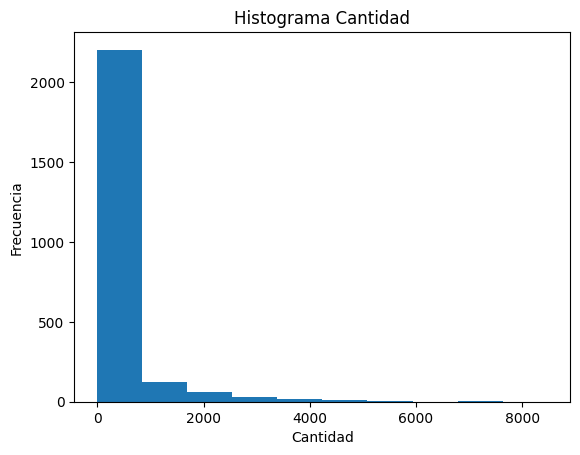

In [ ]:
#Distribucion de la variable target. Histograma
plt.hist(df_final['Cantidad'], bins=10)
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Histograma Cantidad')
plt.show()

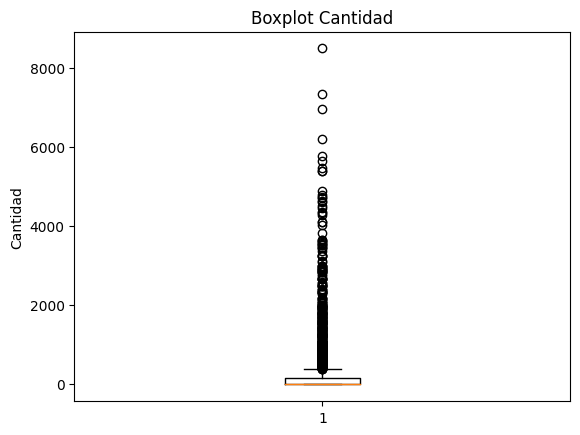

In [ ]:
#Solo para ver que onda con el histograma. Hay numeros muy altos.
plt.boxplot(df_final['Cantidad'])
plt.ylabel('Cantidad')
plt.title('Boxplot Cantidad')
plt.show()

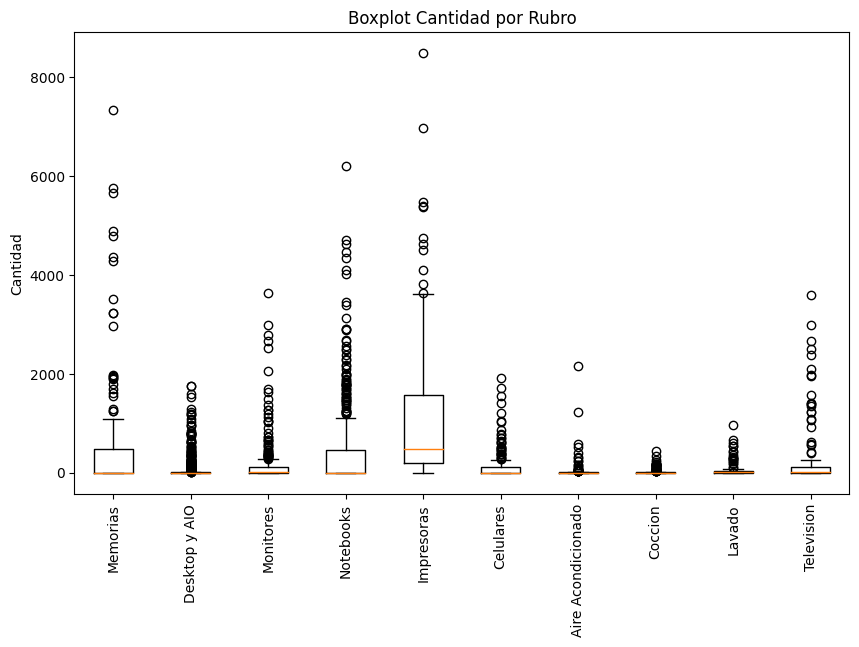

In [ ]:
import matplotlib.pyplot as plt

# Generar boxplot por variable "Rubro"
plt.figure(figsize=(10, 6))
plt.boxplot([df_final['Cantidad'][df_final['RUBRO'] == rubro] for rubro in df_final['RUBRO'].unique()])
plt.xticks(range(1, len(df_final['RUBRO'].unique()) + 1), df_final['RUBRO'].unique(), rotation=90)
plt.ylabel('Cantidad')
plt.title('Boxplot Cantidad por Rubro')
plt.show()

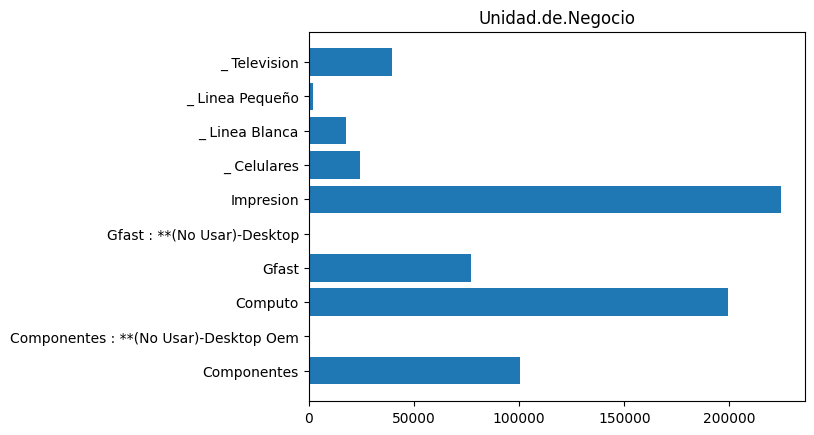

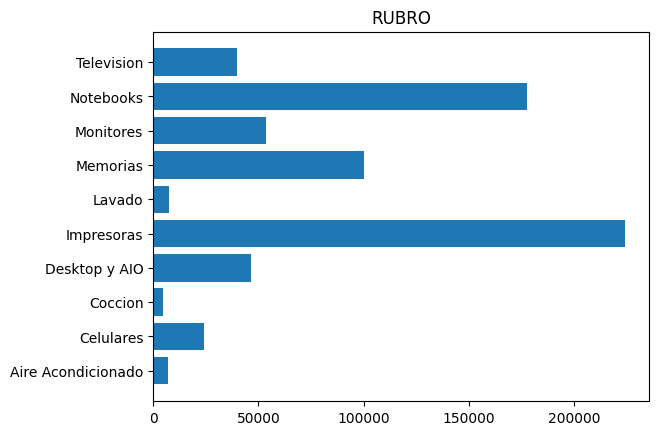

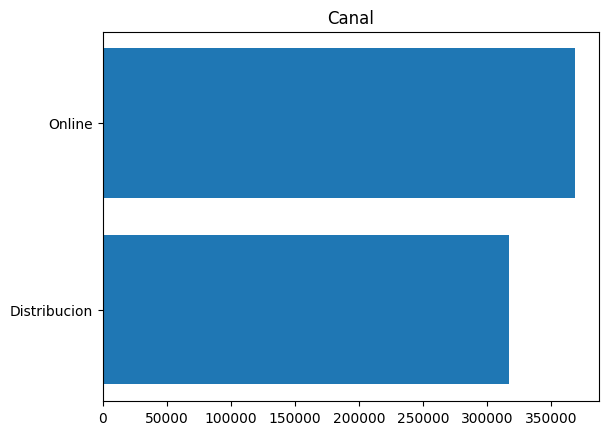

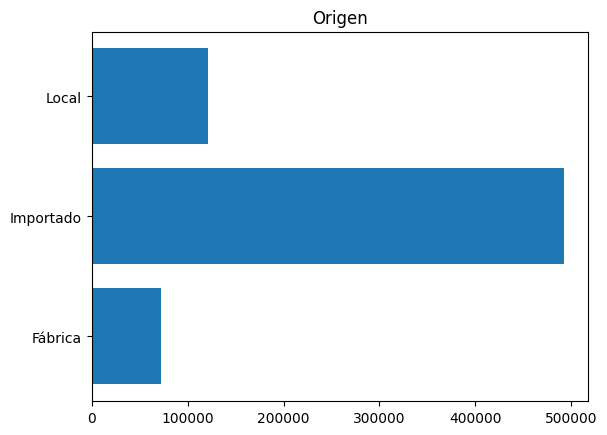

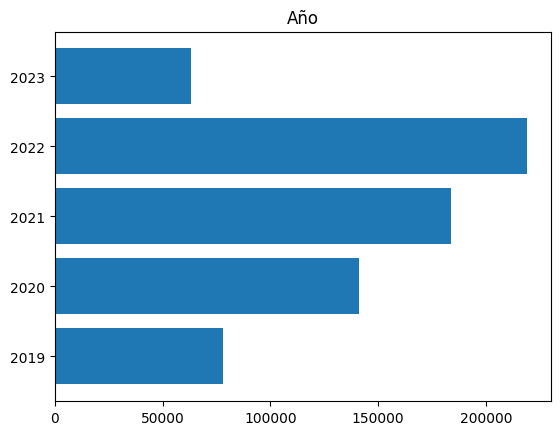

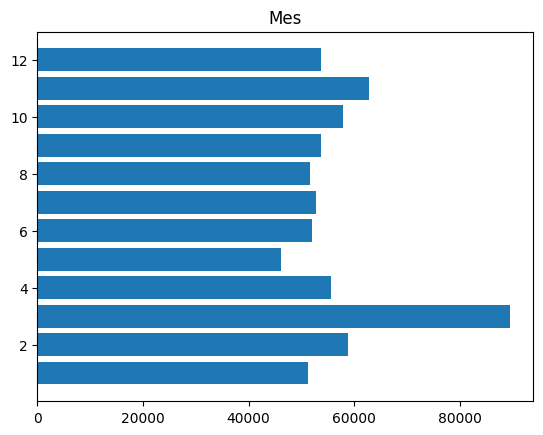

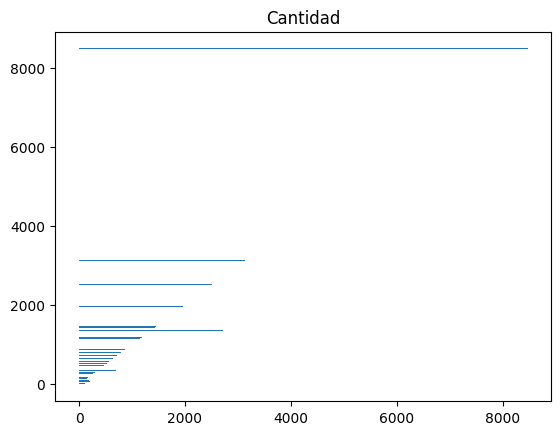

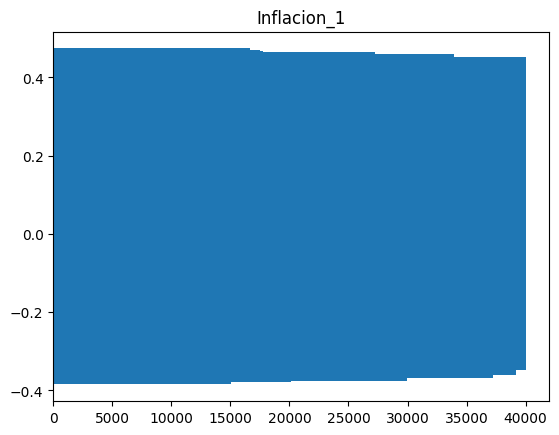

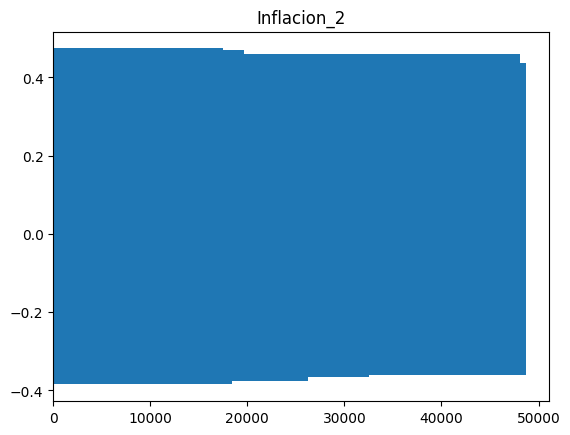

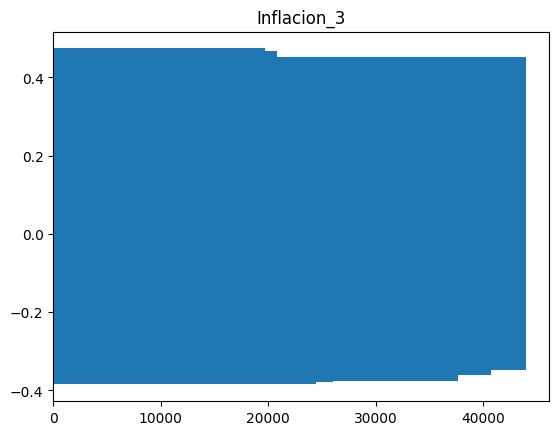

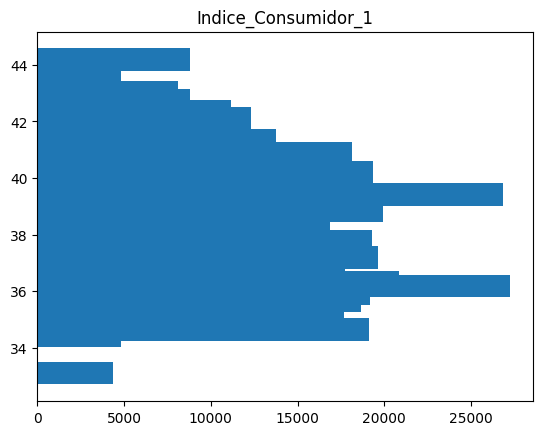

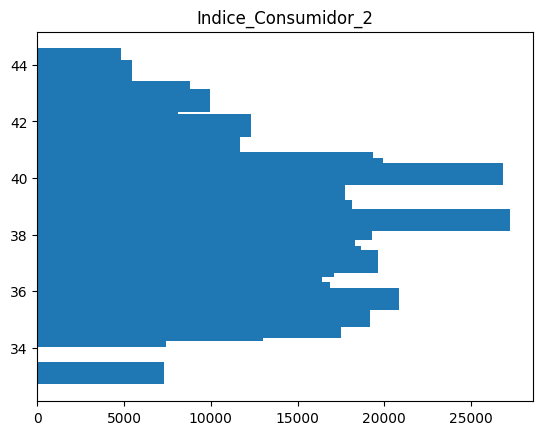

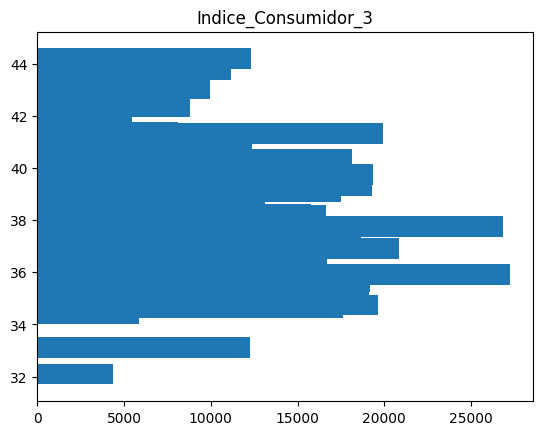

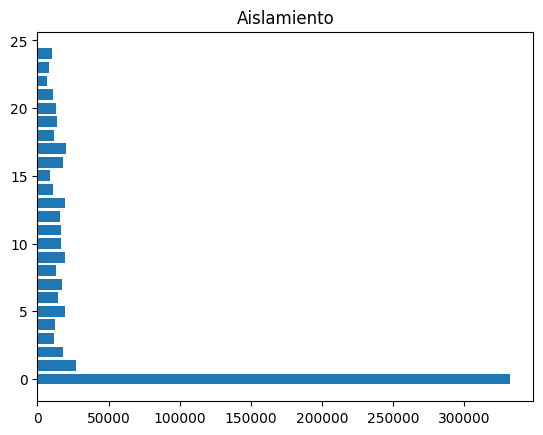

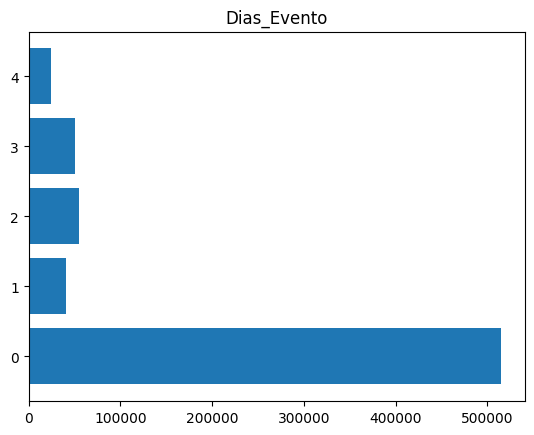

In [ ]:
# Gráfico de barras de las variables categóricas y la variable target
#Demasiadas categorias. revisar
for col in df_final.columns[:-1]:
    grouped = df_final.groupby(col)['Cantidad'].sum()
    plt.barh(grouped.index, grouped.values)
    plt.title(col)
    plt.show()

<ipython-input-30-c77915b37129>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


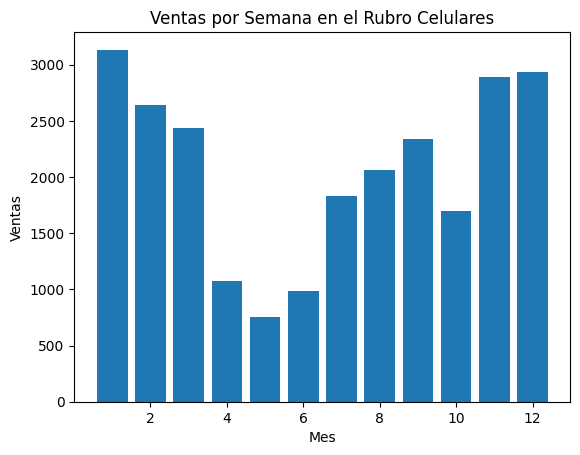

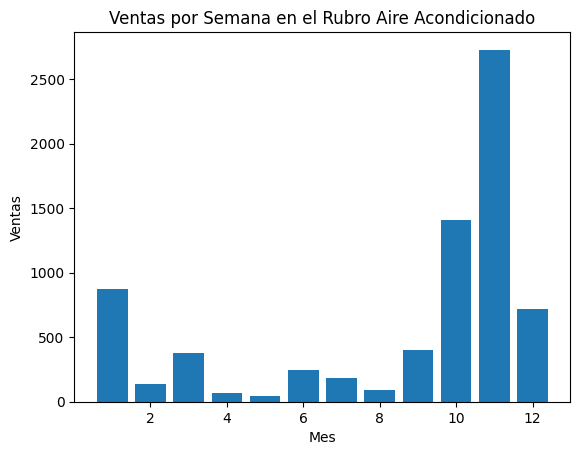

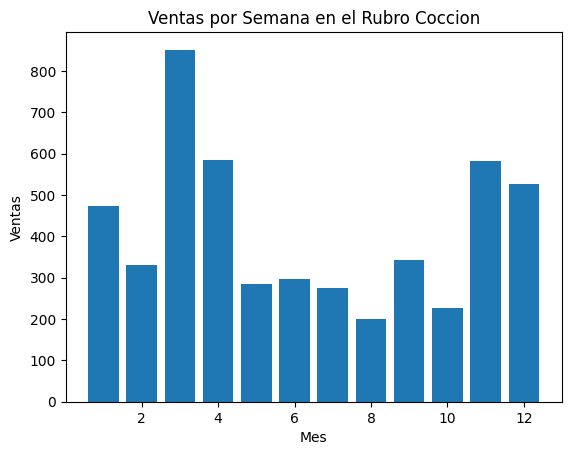

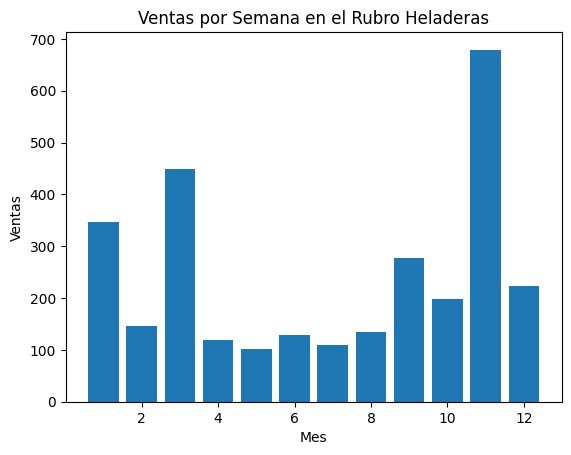

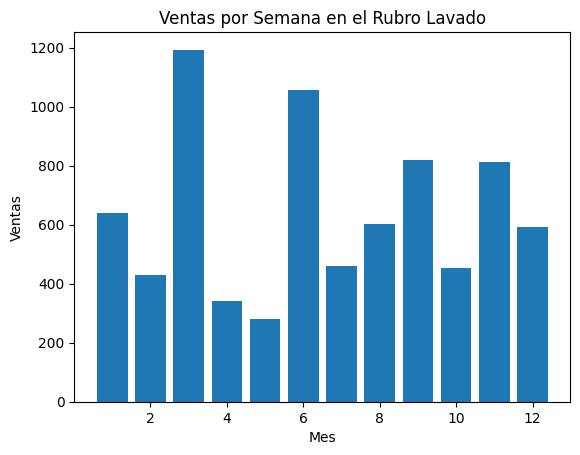

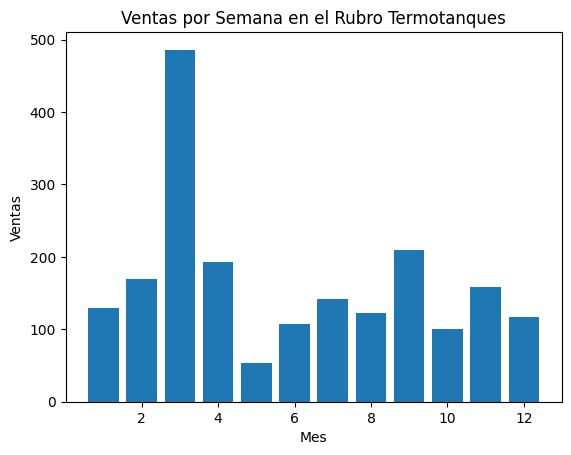

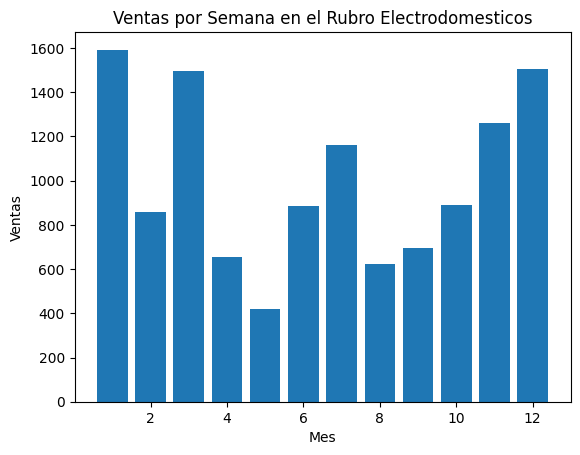

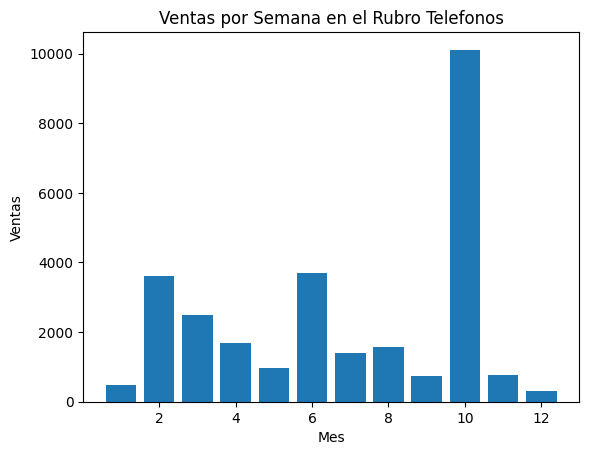

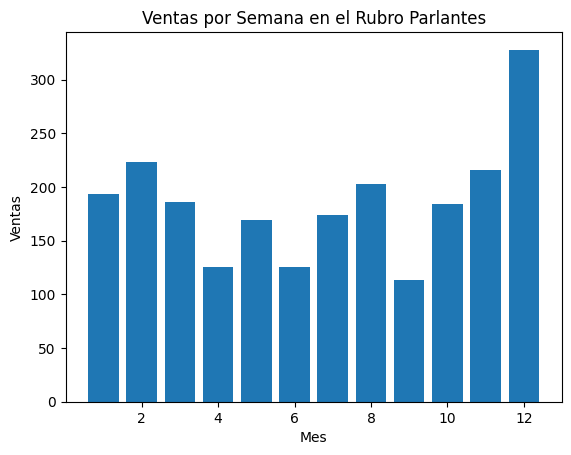

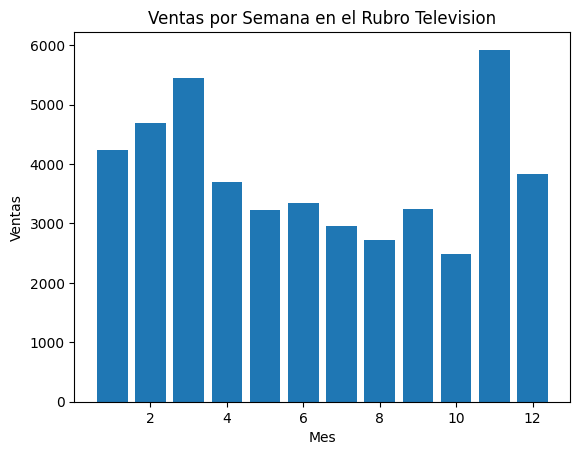

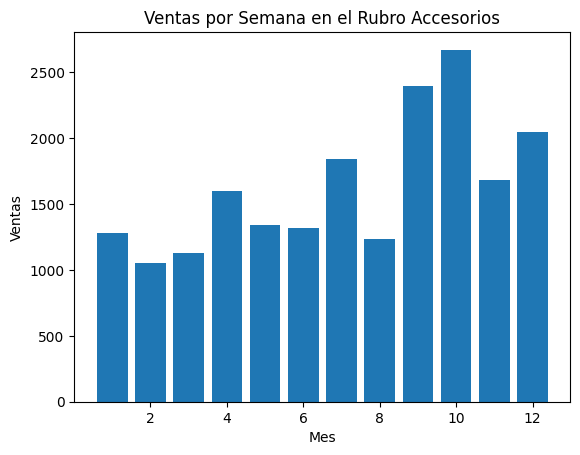

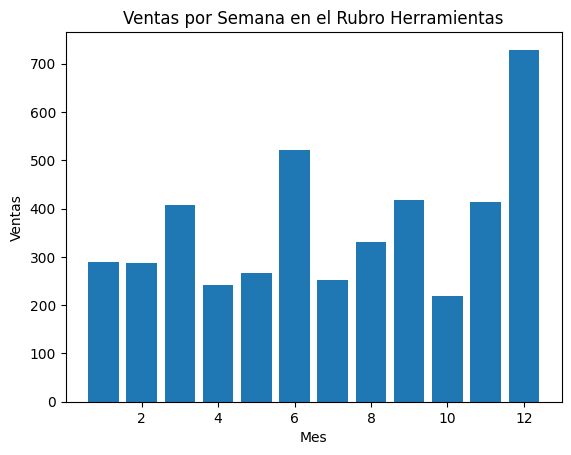

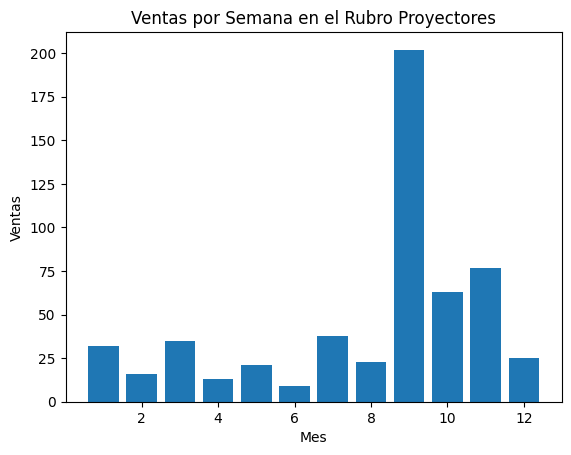

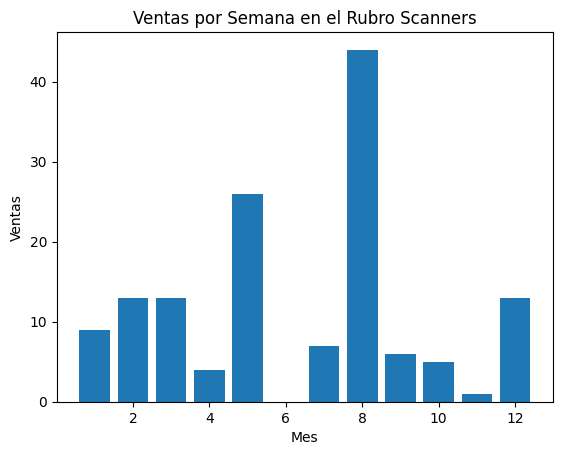

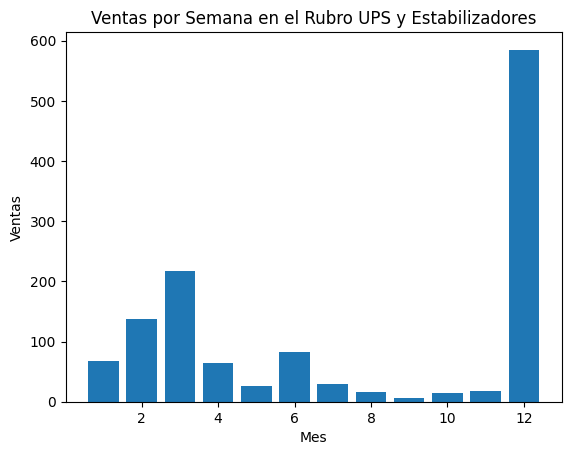

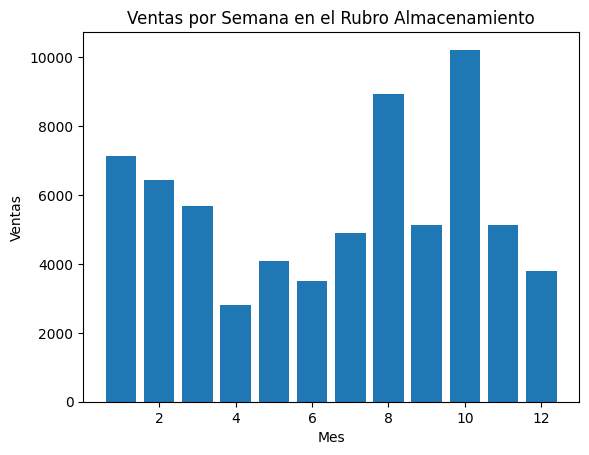

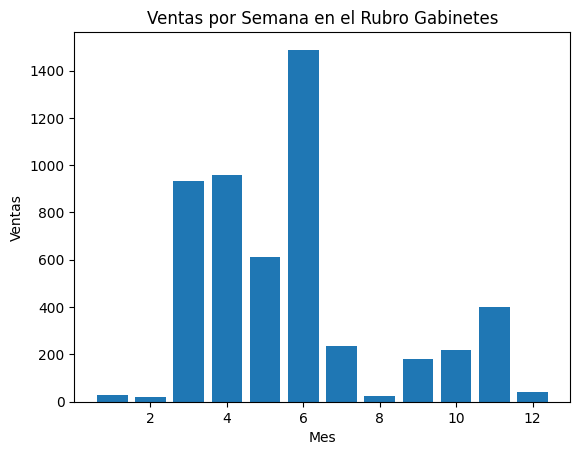

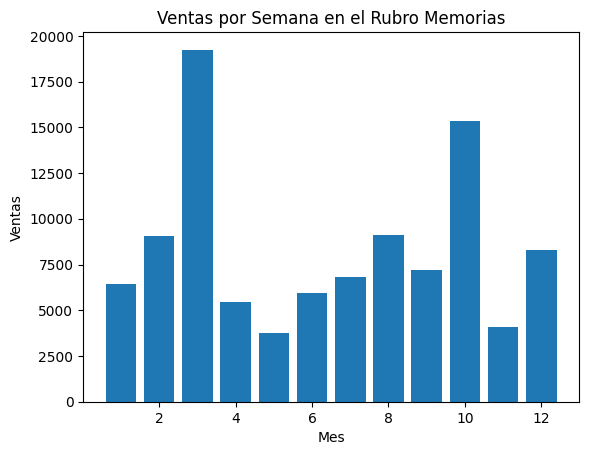

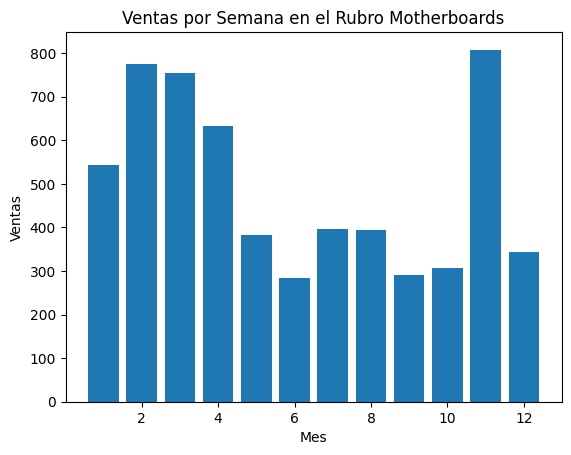

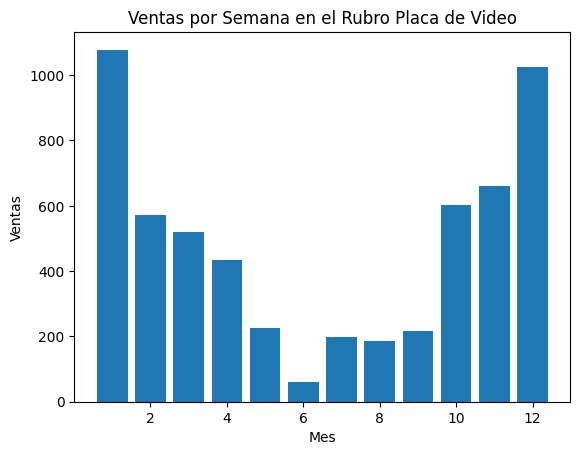

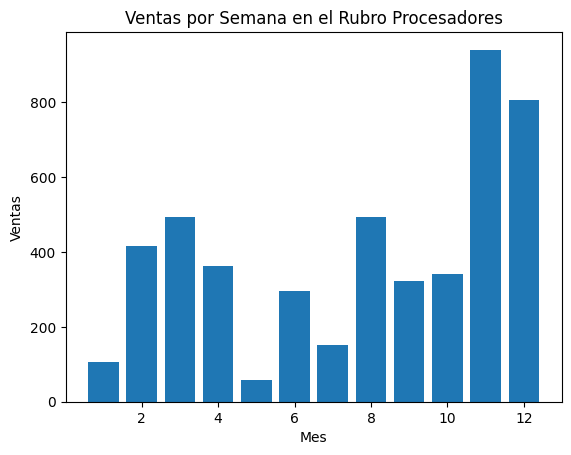

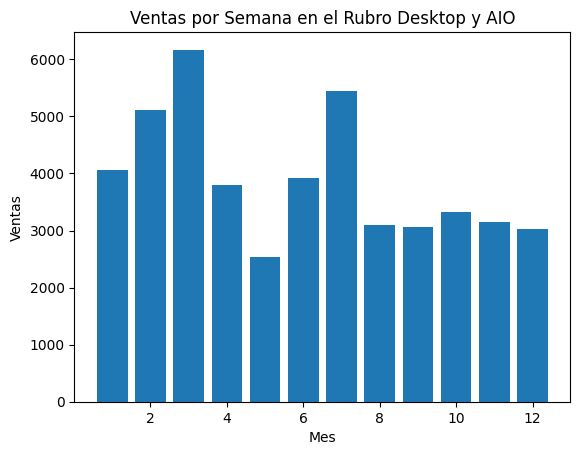

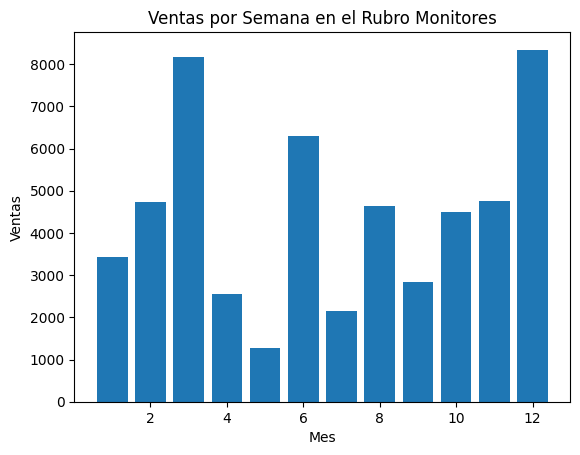

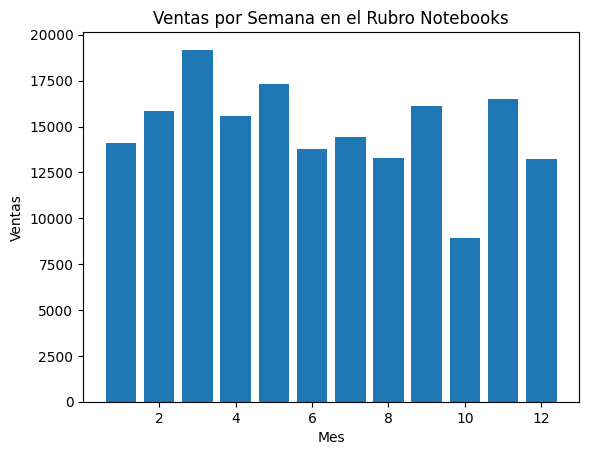

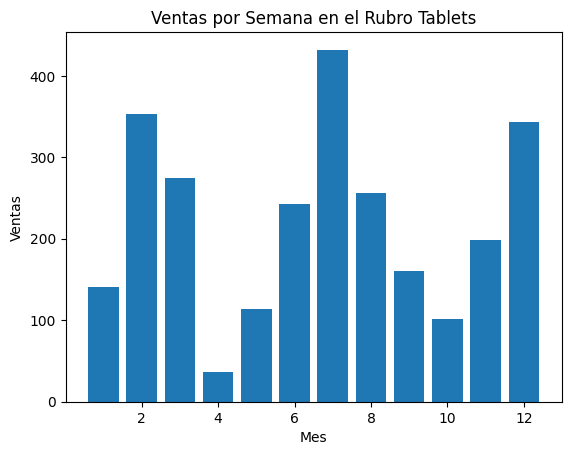

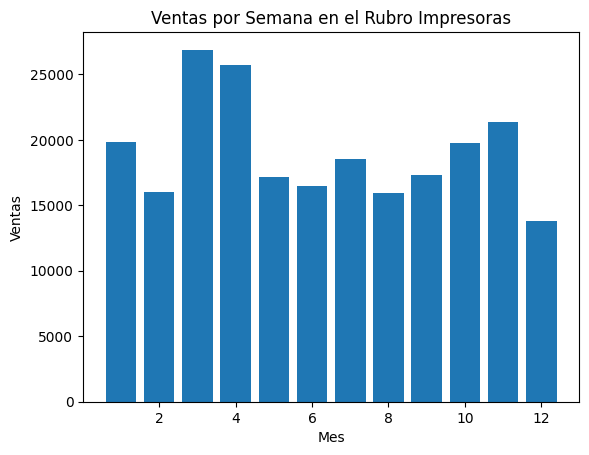

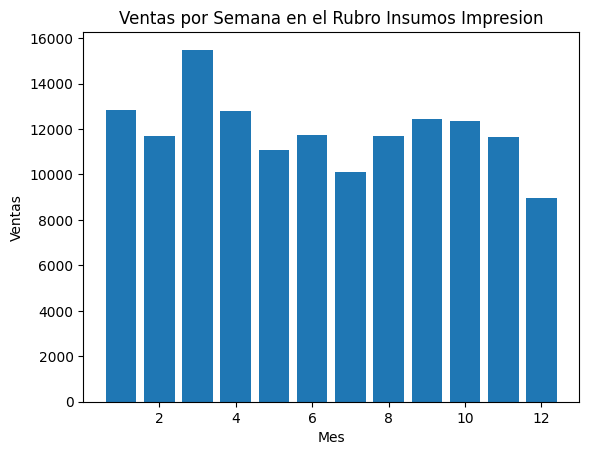

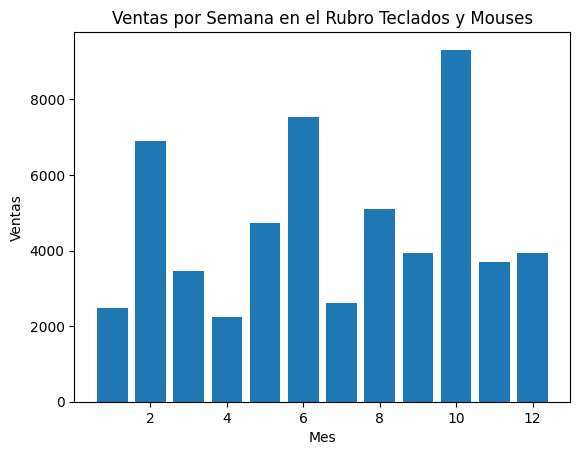

In [ ]:
#Histogramas para cantidad de unidades vendidas por Rubro por Semana
#Nose si esto puede ser muy engañoso
#Demasiados rubros, lo podriamos hacer para algunos.
#Tambien se puede hacer para subrubros y para unidades de negocio, subrurbros y marcas.
df1 = df.groupby(['RUBRO', 'Mes']).sum()
for rubro in df['RUBRO'].unique():
    data_rubro = df1.loc[rubro]
    plt.bar(data_rubro.index, data_rubro['Cantidad'])
    plt.title('Ventas por Semana en el Rubro {}'.format(rubro))
    plt.xlabel('Mes')
    plt.ylabel('Ventas')
    plt.show()

# Correlaciones

<ipython-input-31-4cb6de8d2766>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

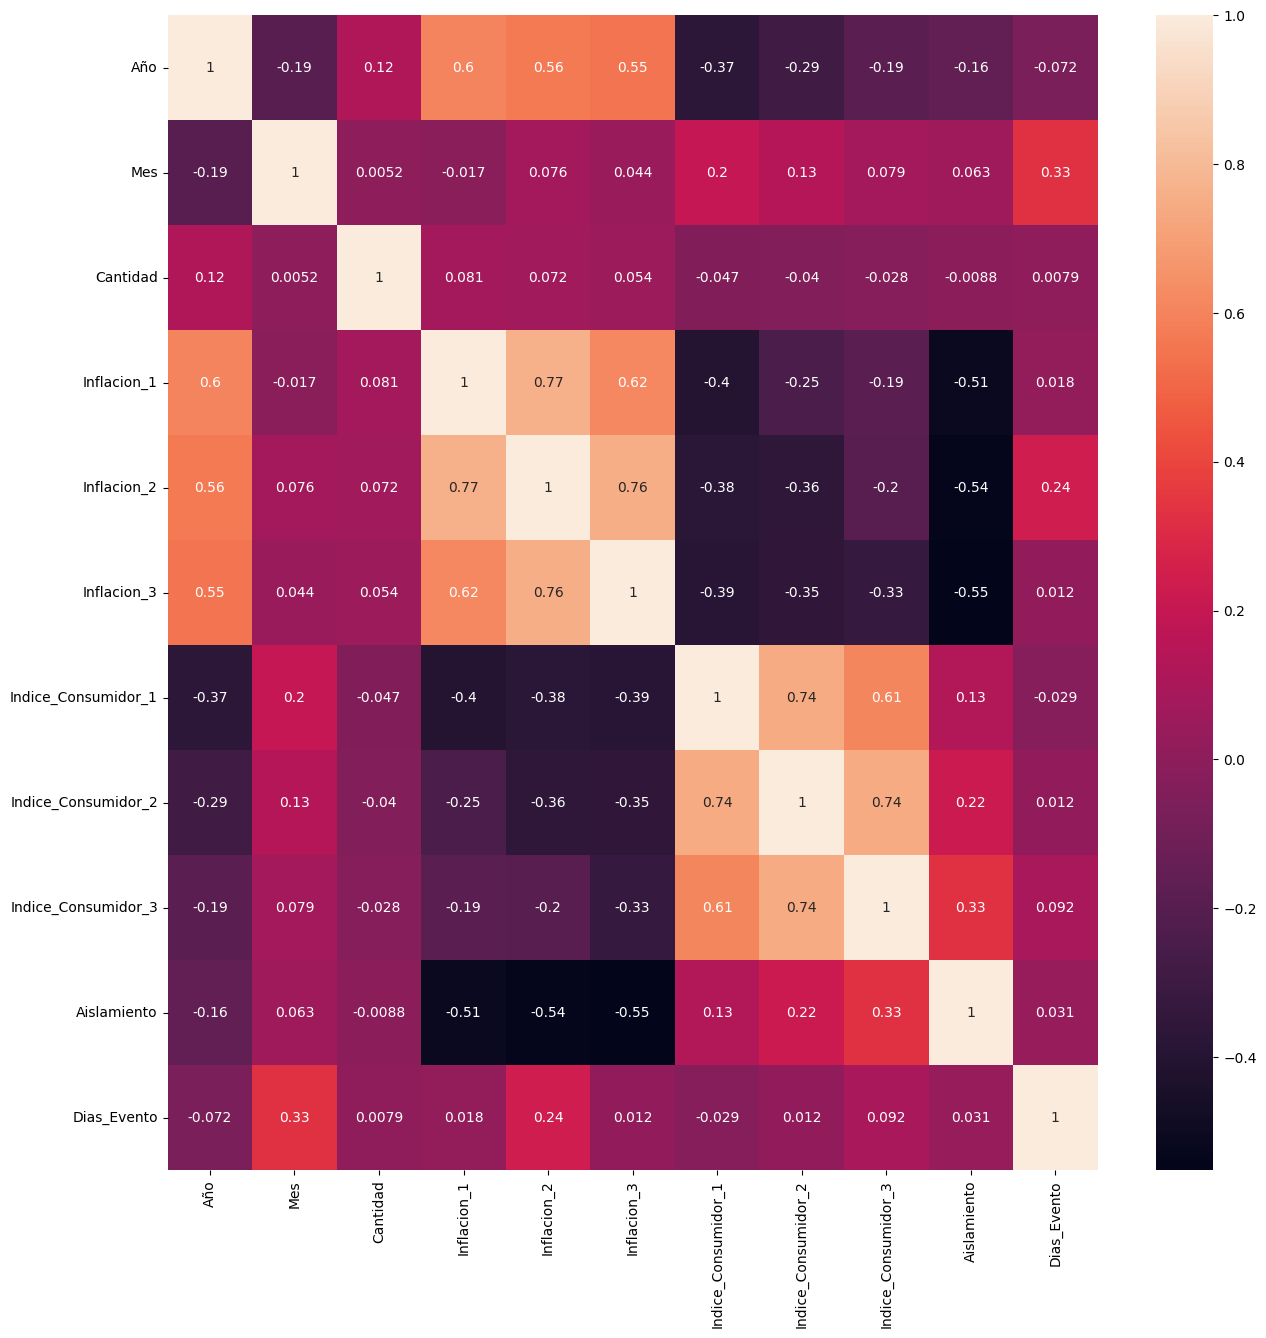

In [ ]:
#Pearson
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df_final.corr(),annot=True)

# Distribuciones



In [ ]:
df_ext['Fecha'] = pd.to_datetime(df_ext['Año'].astype(str) + '-' + df_ext['Mes'].astype(str) + '-01')

In [ ]:
df_ext

,Mes,Año,Inflacion_1,Inflacion_2,Inflacion_3,Indice_Consumidor_1,Indice_Consumidor_2,Indice_Consumidor_3,Aislamiento,Dias_Evento,Fecha
0,1,2019,0.026,0.032,0.054,35.990000,32.100000,32.640000,0,0,2019-01-01
1,2,2019,0.029,0.026,0.032,33.101078,35.990000,32.100000,0,0,2019-02-01
2,3,2019,0.038,0.029,0.026,36.039967,33.101078,35.990000,0,0,2019-03-01
3,4,2019,0.047,0.038,0.029,34.794621,36.039967,33.101078,0,0,2019-04-01
4,5,2019,0.034,0.047,0.038,34.411144,34.794621,36.039967,0,3,2019-05-01
5,6,2019,0.031,0.034,0.047,36.472500,34.411144,34.794621,0,0,2019-06-01
6,7,2019,0.027,0.031,0.034,40.574234,36.472500,34.411144,0,0,2019-07-01
7,8,2019,0.022,0.027,0.031,44.176544,40.574234,36.472500,0,0,2019-08-01
8,9,2019,0.040,0.022,0.027,41.862835,44.176544,40.574234,0,0,2019-09-01
9,10,2019,0.059,0.040,0.022,42.093285,41.862835,44.176544,0,0,2019-10-01


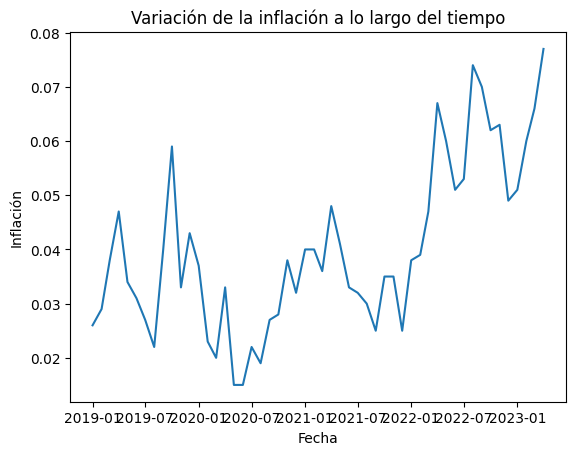

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_ext['Fecha'], df_ext['Inflacion_1'])
ax.set(xlabel='Fecha', ylabel='Inflación',
       title='Variación de la inflación a lo largo del tiempo')
plt.show()

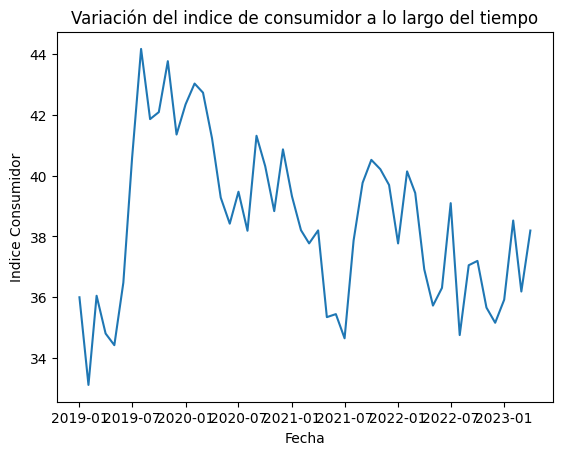

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_ext['Fecha'], df_ext['Indice_Consumidor_1'])
ax.set(xlabel='Fecha', ylabel='Indice Consumidor',
       title='Variación del indice de consumidor a lo largo del tiempo')
plt.show()

Rubros

In [ ]:
df_final['Fecha'] = pd.to_datetime(df_final['Año'].astype(str) + '-' + df_final['Mes'].astype(str) + '-01')

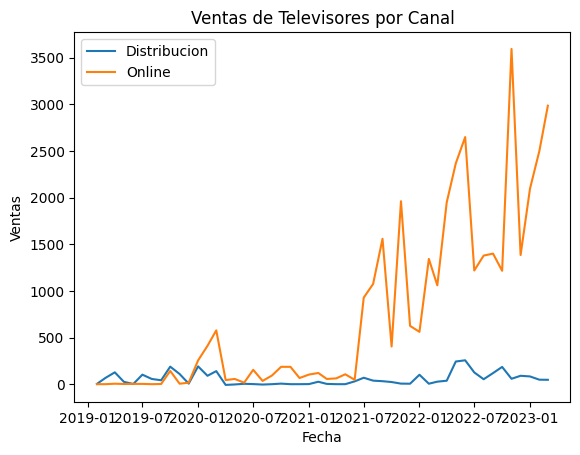

In [ ]:
df_smart_tv = df_final.loc[(df_final['RUBRO'] == 'Television') & (df_final['Unidad.de.Negocio'] != 'IT Accesorios')]

df_smart_tv = df_smart_tv.groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()

canal_1 = df_smart_tv[df_smart_tv['Canal'] == 'Distribucion']
canal_2 = df_smart_tv[df_smart_tv['Canal'] == 'Online']

plt.plot(canal_1['Fecha'], canal_1['Cantidad'], label='Distribucion')
plt.plot(canal_2['Fecha'], canal_2['Cantidad'], label='Online')
plt.title('Ventas de Televisores por Canal')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()



In [ ]:
df_online = df_smart_tv[df_smart_tv['Canal'] == 'Online'][['Fecha', 'Cantidad']].reset_index(drop=True)
print(df_online)


        Fecha  Cantidad
0  2019-02-01       0.0
1  2019-03-01       0.0
2  2019-04-01       5.0
3  2019-05-01       2.0
4  2019-06-01       3.0
5  2019-07-01       3.0
6  2019-08-01       0.0
7  2019-09-01       2.0
8  2019-10-01     142.0
9  2019-11-01       5.0
10 2019-12-01      16.0
11 2020-01-01     255.0
12 2020-02-01     411.0
13 2020-03-01     577.0
14 2020-04-01      44.0
15 2020-05-01      56.0
16 2020-06-01      16.0
17 2020-07-01     154.0
18 2020-08-01      35.0
19 2020-09-01      93.0
20 2020-10-01     186.0
21 2020-11-01     186.0
22 2020-12-01      66.0
23 2021-01-01     103.0
24 2021-02-01     120.0
25 2021-03-01      56.0
26 2021-04-01      62.0
27 2021-05-01     106.0
28 2021-06-01      47.0
29 2021-07-01     928.0
30 2021-08-01    1075.0
31 2021-09-01    1559.0
32 2021-10-01     404.0
33 2021-11-01    1962.0
34 2021-12-01     625.0
35 2022-01-01     561.0
36 2022-02-01    1343.0
37 2022-03-01    1060.0
38 2022-04-01    1949.0
39 2022-05-01    2368.0
40 2022-06-01   

In [ ]:
df_final = df_final.loc[~((df_final['RUBRO'] == 'Television') & (df_final['Canal'] == 'Online') & (df_final['Fecha'].isin(['2019-02-01', '2019-03-01'])))]

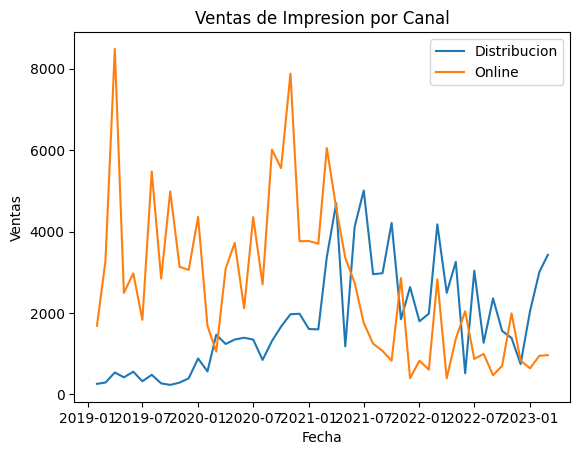

In [ ]:
df_impresion = df_final.loc[df_final['RUBRO'] == 'Impresoras'].groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()
canal_1 = df_impresion[df_impresion['Canal'] == 'Distribucion']
canal_2 = df_impresion[df_impresion['Canal'] == 'Online']

plt.plot(canal_1['Fecha'], canal_1['Cantidad'], label='Distribucion')
plt.plot(canal_2['Fecha'], canal_2['Cantidad'], label='Online')
plt.title('Ventas de Impresion por Canal')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()


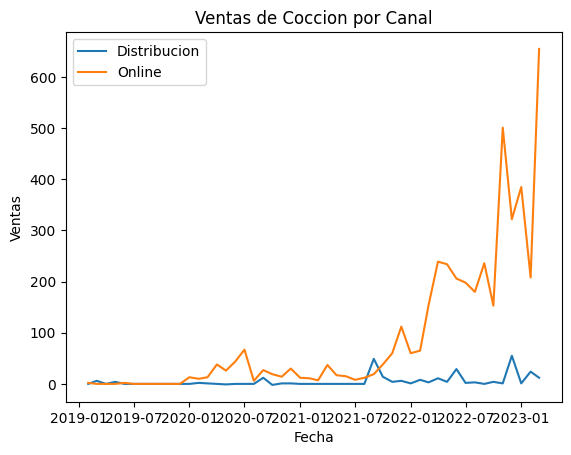

In [ ]:
df_coccion = df_final.loc[df_final['RUBRO'] == 'Coccion'].groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()
canal_1 = df_coccion[df_coccion['Canal'] == 'Distribucion']
canal_2 = df_coccion[df_coccion['Canal'] == 'Online']

plt.plot(canal_1['Fecha'], canal_1['Cantidad'], label='Distribucion')
plt.plot(canal_2['Fecha'], canal_2['Cantidad'], label='Online')
plt.title('Ventas de Coccion por Canal')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [ ]:
df_tv = df_final.loc[(df_final['RUBRO'] == 'Coccion')]

df_tv_canal = df_tv.groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()

df_distribucion = df_tv_canal[df_tv_canal['Canal'] == 'Distribucion'][['Fecha', 'Cantidad']].reset_index(drop=True)
df_online = df_tv_canal[df_tv_canal['Canal'] == 'Online'][['Fecha', 'Cantidad']].reset_index(drop=True)

print(df_distribucion)
print(df_online)


        Fecha  Cantidad
0  2019-02-01       0.0
1  2019-03-01       6.0
2  2019-04-01       0.0
3  2019-05-01       4.0
4  2019-06-01       0.0
5  2019-07-01       0.0
6  2019-08-01       0.0
7  2019-09-01       0.0
8  2019-10-01       0.0
9  2019-11-01       0.0
10 2019-12-01       0.0
11 2020-01-01       0.0
12 2020-02-01       2.0
13 2020-03-01       1.0
14 2020-04-01       0.0
15 2020-05-01      -1.0
16 2020-06-01       0.0
17 2020-07-01       0.0
18 2020-08-01       0.0
19 2020-09-01      12.0
20 2020-10-01      -2.0
21 2020-11-01       1.0
22 2020-12-01       1.0
23 2021-01-01       0.0
24 2021-02-01       0.0
25 2021-03-01       0.0
26 2021-04-01       0.0
27 2021-05-01       0.0
28 2021-06-01       0.0
29 2021-07-01       0.0
30 2021-08-01       0.0
31 2021-09-01      49.0
32 2021-10-01      14.0
33 2021-11-01       4.0
34 2021-12-01       6.0
35 2022-01-01       1.0
36 2022-02-01       8.0
37 2022-03-01       3.0
38 2022-04-01      11.0
39 2022-05-01       4.0
40 2022-06-01   

In [ ]:
df_final = df_final.loc[~((df_final['RUBRO'] == 'Coccion') & (df_final['Canal'] == 'Distribucion') & (df_final['Fecha'].isin(['2019-02-01'])))]

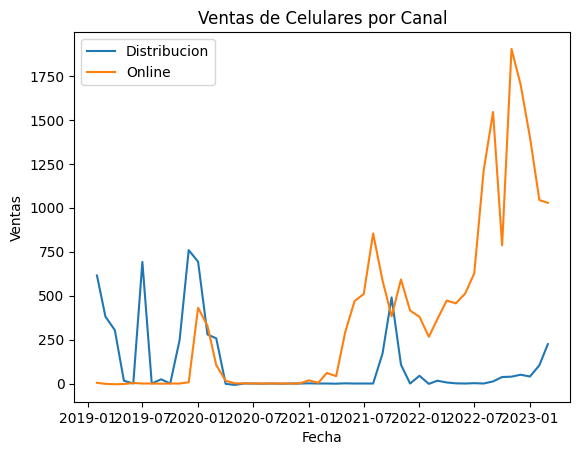

In [ ]:
df_celulares = df_final.loc[df_final['RUBRO'] == 'Celulares'].groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()
canal_1 = df_celulares[df_celulares['Canal'] == 'Distribucion']
canal_2 = df_celulares[df_celulares['Canal'] == 'Online']

plt.plot(canal_1['Fecha'], canal_1['Cantidad'], label='Distribucion')
plt.plot(canal_2['Fecha'], canal_2['Cantidad'], label='Online')
plt.title('Ventas de Celulares por Canal')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

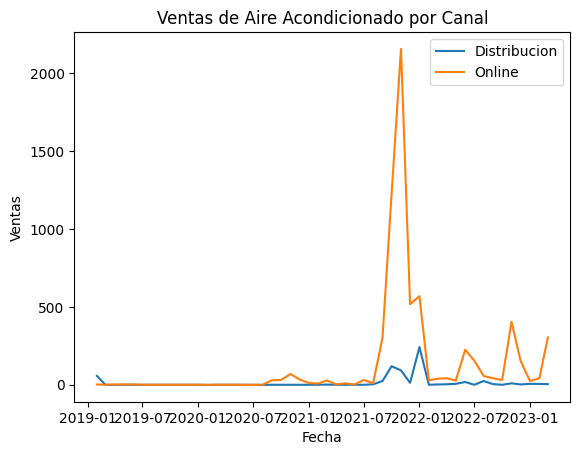

In [ ]:
df_aires = df_final.loc[df_final['RUBRO'] == 'Aire Acondicionado'].groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()
canal_1 = df_aires[df_aires['Canal'] == 'Distribucion']
canal_2 = df_aires[df_aires['Canal'] == 'Online']

plt.plot(canal_1['Fecha'], canal_1['Cantidad'], label='Distribucion')
plt.plot(canal_2['Fecha'], canal_2['Cantidad'], label='Online')
plt.title('Ventas de Aire Acondicionado por Canal')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [ ]:
df_tv = df_final.loc[(df_final['RUBRO'] == 'Aire Acondicionado')]

df_tv_canal = df_tv.groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()

df_distribucion = df_tv_canal[df_tv_canal['Canal'] == 'Distribucion'][['Fecha', 'Cantidad']].reset_index(drop=True)
df_online = df_tv_canal[df_tv_canal['Canal'] == 'Online'][['Fecha', 'Cantidad']].reset_index(drop=True)

print(df_distribucion)
print(df_online)


        Fecha  Cantidad
0  2019-02-01      57.0
1  2019-03-01       0.0
2  2019-04-01      -1.0
3  2019-05-01       0.0
4  2019-06-01       0.0
5  2019-07-01       0.0
6  2019-08-01       0.0
7  2019-09-01       0.0
8  2019-10-01       0.0
9  2019-11-01       0.0
10 2019-12-01       0.0
11 2020-01-01       0.0
12 2020-02-01      -1.0
13 2020-03-01       0.0
14 2020-04-01       0.0
15 2020-05-01       0.0
16 2020-06-01       0.0
17 2020-07-01       0.0
18 2020-08-01      -1.0
19 2020-09-01       0.0
20 2020-10-01       0.0
21 2020-11-01       0.0
22 2020-12-01       0.0
23 2021-01-01       0.0
24 2021-02-01       0.0
25 2021-03-01       1.0
26 2021-04-01       0.0
27 2021-05-01       0.0
28 2021-06-01       0.0
29 2021-07-01       0.0
30 2021-08-01       3.0
31 2021-09-01      24.0
32 2021-10-01     119.0
33 2021-11-01      92.0
34 2021-12-01      12.0
35 2022-01-01     242.0
36 2022-02-01       0.0
37 2022-03-01       2.0
38 2022-04-01       3.0
39 2022-05-01       6.0
40 2022-06-01   

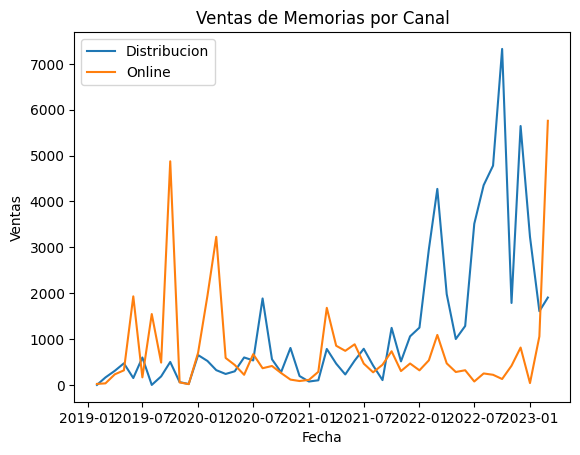

In [ ]:
df_memorias = df_final.loc[df_final['RUBRO'] == 'Memorias'].groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()
canal_1 = df_memorias[df_memorias['Canal'] == 'Distribucion']
canal_2 = df_memorias[df_memorias['Canal'] == 'Online']

plt.plot(canal_1['Fecha'], canal_1['Cantidad'], label='Distribucion')
plt.plot(canal_2['Fecha'], canal_2['Cantidad'], label='Online')
plt.title('Ventas de Memorias por Canal')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

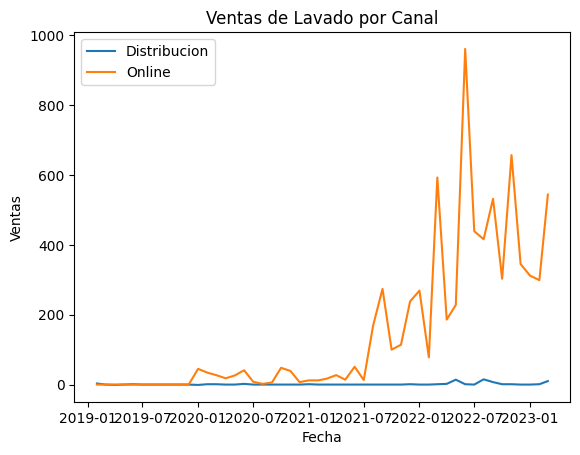

In [ ]:
df_lavado = df_final.loc[df_final['RUBRO'] == 'Lavado'].groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()
canal_1 = df_lavado[df_lavado['Canal'] == 'Distribucion']
canal_2 = df_lavado[df_lavado['Canal'] == 'Online']

plt.plot(canal_1['Fecha'], canal_1['Cantidad'], label='Distribucion')
plt.plot(canal_2['Fecha'], canal_2['Cantidad'], label='Online')
plt.title('Ventas de Lavado por Canal')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [ ]:
df_tv = df_final.loc[(df_final['RUBRO'] == 'Lavado')]

df_tv_canal = df_tv.groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()

df_distribucion = df_tv_canal[df_tv_canal['Canal'] == 'Distribucion'][['Fecha', 'Cantidad']].reset_index(drop=True)
df_online = df_tv_canal[df_tv_canal['Canal'] == 'Online'][['Fecha', 'Cantidad']].reset_index(drop=True)

print(df_distribucion)
print(df_online)


        Fecha  Cantidad
0  2019-02-01       3.0
1  2019-03-01       0.0
2  2019-04-01      -1.0
3  2019-05-01       0.0
4  2019-06-01       1.0
5  2019-07-01       0.0
6  2019-08-01       0.0
7  2019-09-01       0.0
8  2019-10-01       0.0
9  2019-11-01       0.0
10 2019-12-01       0.0
11 2020-01-01      -1.0
12 2020-02-01       1.0
13 2020-03-01       1.0
14 2020-04-01       0.0
15 2020-05-01       0.0
16 2020-06-01       2.0
17 2020-07-01       0.0
18 2020-08-01       0.0
19 2020-09-01       0.0
20 2020-10-01       0.0
21 2020-11-01       0.0
22 2020-12-01       0.0
23 2021-01-01       1.0
24 2021-02-01       0.0
25 2021-03-01       0.0
26 2021-04-01       0.0
27 2021-05-01       0.0
28 2021-06-01       0.0
29 2021-07-01       0.0
30 2021-08-01       0.0
31 2021-09-01       0.0
32 2021-10-01       0.0
33 2021-11-01       0.0
34 2021-12-01       1.0
35 2022-01-01       0.0
36 2022-02-01       0.0
37 2022-03-01       1.0
38 2022-04-01       2.0
39 2022-05-01      14.0
40 2022-06-01   

In [ ]:
df_final = df_final.loc[~((df_final['RUBRO'] == 'Lavado') & (df_final['Canal'] == 'Online') & (df_final['Fecha'].between('2019-02-01', '2019-12-01')))]

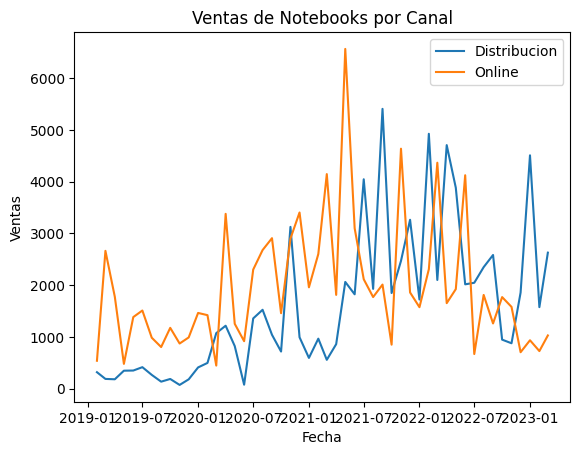

In [ ]:
df_notebooks = df_final.loc[df_final['RUBRO'] == 'Notebooks'].groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()
canal_1 = df_notebooks[df_notebooks['Canal'] == 'Distribucion']
canal_2 = df_notebooks[df_notebooks['Canal'] == 'Online']

plt.plot(canal_1['Fecha'], canal_1['Cantidad'], label='Distribucion')
plt.plot(canal_2['Fecha'], canal_2['Cantidad'], label='Online')
plt.title('Ventas de Notebooks por Canal')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

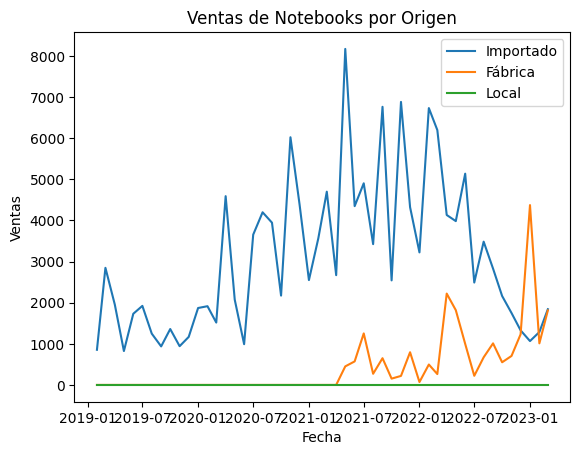

In [ ]:
df_notebooks = df_final.loc[df_final['RUBRO'] == 'Notebooks'].groupby(['Fecha', 'Origen'])['Cantidad'].sum().reset_index()
origen_1 = df_notebooks[df_notebooks['Origen'] == 'Importado']
origen_2 = df_notebooks[df_notebooks['Origen'] == 'Fábrica']
origen_3 = df_notebooks[df_notebooks['Origen'] == 'Local']

plt.plot(origen_1['Fecha'], origen_1['Cantidad'], label='Importado')
plt.plot(origen_2['Fecha'], origen_2['Cantidad'], label='Fábrica')
plt.plot(origen_3['Fecha'], origen_3['Cantidad'], label='Local')
plt.title('Ventas de Notebooks por Origen')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [ ]:
df_tv = df_final.loc[(df_final['RUBRO'] == 'Notebooks')]

df_tv_canal = df_tv.groupby(['Fecha', 'Origen'])['Cantidad'].sum().reset_index()

df_fabrica = df_tv_canal[df_tv_canal['Origen'] == 'Fábrica'][['Fecha', 'Cantidad']].reset_index(drop=True)
df_local = df_tv_canal[df_tv_canal['Origen'] == 'Local'][['Fecha', 'Cantidad']].reset_index(drop=True)

print(df_fabrica)
print(df_local)


        Fecha  Cantidad
0  2019-02-01       0.0
1  2019-03-01       0.0
2  2019-04-01       0.0
3  2019-05-01       0.0
4  2019-06-01       0.0
5  2019-07-01       0.0
6  2019-08-01       0.0
7  2019-09-01       0.0
8  2019-10-01       0.0
9  2019-11-01       0.0
10 2019-12-01       0.0
11 2020-01-01       0.0
12 2020-02-01       0.0
13 2020-03-01       0.0
14 2020-04-01       0.0
15 2020-05-01       0.0
16 2020-06-01       0.0
17 2020-07-01       0.0
18 2020-08-01       0.0
19 2020-09-01       0.0
20 2020-10-01       0.0
21 2020-11-01       0.0
22 2020-12-01       0.0
23 2021-01-01       0.0
24 2021-02-01       0.0
25 2021-03-01       0.0
26 2021-04-01       0.0
27 2021-05-01     451.0
28 2021-06-01     572.0
29 2021-07-01    1253.0
30 2021-08-01     271.0
31 2021-09-01     650.0
32 2021-10-01     153.0
33 2021-11-01     219.0
34 2021-12-01     795.0
35 2022-01-01      70.0
36 2022-02-01     496.0
37 2022-03-01     264.0
38 2022-04-01    2222.0
39 2022-05-01    1819.0
40 2022-06-01   

In [ ]:
df_final = df_final.loc[~((df_final['RUBRO'] == 'Notebooks') & (df_final['Origen'] == 'Fábrica') & (df_final['Fecha'].between('2019-02-01', '2021-04-01')))]
df_final = df_final.loc[~((df_final['RUBRO'] == 'Notebooks') & (df_final['Origen'] == 'Local'))]

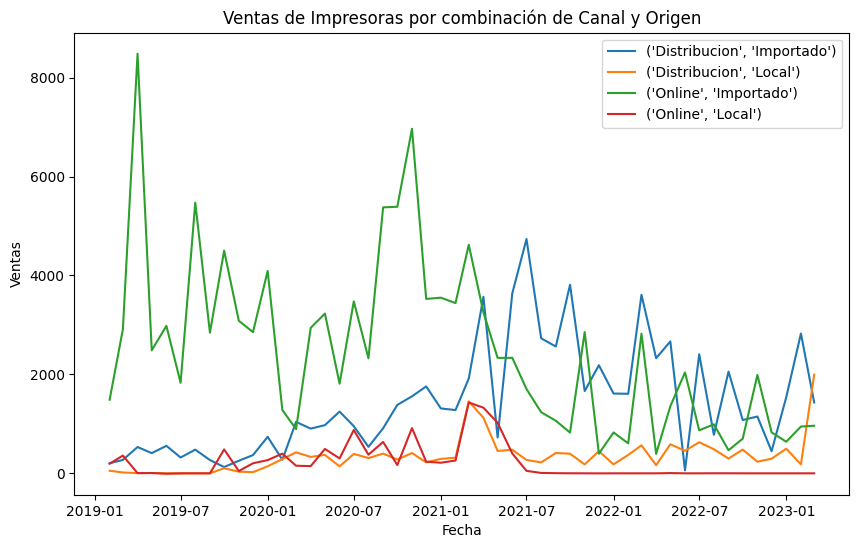

In [ ]:
table = pd.pivot_table(df_final[df_final.RUBRO == "Impresoras"], values="Cantidad", index="Fecha",
                       columns=["Canal", "Origen"], aggfunc="sum")

plt.figure(figsize=(10, 6))
for column in table.columns:
    plt.plot(table.index, table[column], label=column)
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.title("Ventas de Impresoras por combinación de Canal y Origen")
plt.legend()
plt.show()

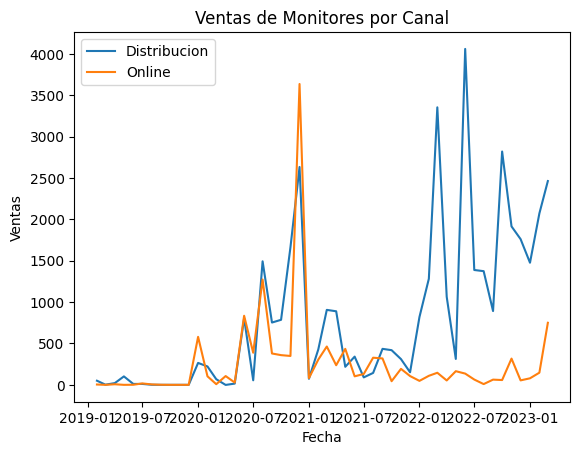

In [ ]:
df_monitores = df_final.loc[df_final['RUBRO'] == 'Monitores'].groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()
canal_1 = df_monitores[df_monitores['Canal'] == 'Distribucion']
canal_2 = df_monitores[df_monitores['Canal'] == 'Online']

plt.plot(canal_1['Fecha'], canal_1['Cantidad'], label='Distribucion')
plt.plot(canal_2['Fecha'], canal_2['Cantidad'], label='Online')
plt.title('Ventas de Monitores por Canal')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [ ]:
df_tv = df_final.loc[(df_final['RUBRO'] == 'Monitores')]

df_tv_canal = df_tv.groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()

df_distribucion = df_tv_canal[df_tv_canal['Canal'] == 'Distribucion'][['Fecha', 'Cantidad']].reset_index(drop=True)
df_online = df_tv_canal[df_tv_canal['Canal'] == 'Online'][['Fecha', 'Cantidad']].reset_index(drop=True)

print(df_distribucion)
print(df_online)

        Fecha  Cantidad
0  2019-02-01      50.0
1  2019-03-01       2.0
2  2019-04-01      21.0
3  2019-05-01     102.0
4  2019-06-01      11.0
5  2019-07-01      11.0
6  2019-08-01       1.0
7  2019-09-01       0.0
8  2019-10-01       0.0
9  2019-11-01       0.0
10 2019-12-01       0.0
11 2020-01-01     265.0
12 2020-02-01     222.0
13 2020-03-01      68.0
14 2020-04-01      -1.0
15 2020-05-01      15.0
16 2020-06-01     804.0
17 2020-07-01      55.0
18 2020-08-01    1493.0
19 2020-09-01     753.0
20 2020-10-01     786.0
21 2020-11-01    1663.0
22 2020-12-01    2633.0
23 2021-01-01      73.0
24 2021-02-01     429.0
25 2021-03-01     906.0
26 2021-04-01     889.0
27 2021-05-01     218.0
28 2021-06-01     341.0
29 2021-07-01      90.0
30 2021-08-01     144.0
31 2021-09-01     435.0
32 2021-10-01     419.0
33 2021-11-01     311.0
34 2021-12-01     152.0
35 2022-01-01     820.0
36 2022-02-01    1282.0
37 2022-03-01    3354.0
38 2022-04-01    1064.0
39 2022-05-01     313.0
40 2022-06-01   

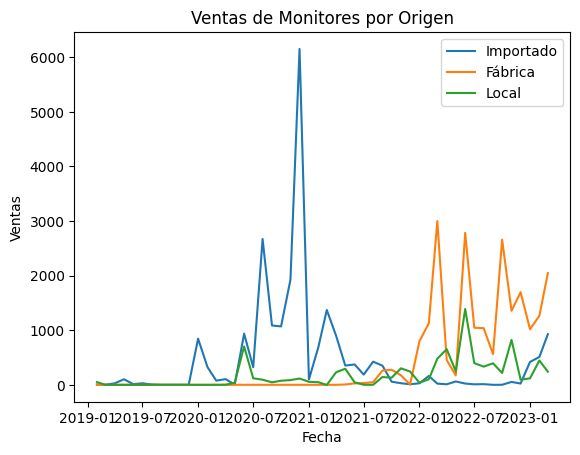

In [ ]:
df_monitores = df_final.loc[df_final['RUBRO'] == 'Monitores'].groupby(['Fecha', 'Origen'])['Cantidad'].sum().reset_index()
origen_1 = df_monitores[df_monitores['Origen'] == 'Importado']
origen_2 = df_monitores[df_monitores['Origen'] == 'Fábrica']
origen_3 = df_monitores[df_monitores['Origen'] == 'Local']

plt.plot(origen_1['Fecha'], origen_1['Cantidad'], label='Importado')
plt.plot(origen_2['Fecha'], origen_2['Cantidad'], label='Fábrica')
plt.plot(origen_3['Fecha'], origen_3['Cantidad'], label='Local')
plt.title('Ventas de Monitores por Origen')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [ ]:
df_tv = df_final.loc[(df_final['RUBRO'] == 'Monitores')]

df_tv_canal = df_tv.groupby(['Fecha', 'Origen'])['Cantidad'].sum().reset_index()

df_fabrica = df_tv_canal[df_tv_canal['Origen'] == 'Fábrica'][['Fecha', 'Cantidad']].reset_index(drop=True)
df_local = df_tv_canal[df_tv_canal['Origen'] == 'Local'][['Fecha', 'Cantidad']].reset_index(drop=True)
df_importado = df_tv_canal[df_tv_canal['Origen'] == 'Importado'][['Fecha', 'Cantidad']].reset_index(drop=True)

print(df_fabrica)
print(df_local)
print(df_importado)

        Fecha  Cantidad
0  2019-02-01       0.0
1  2019-03-01       0.0
2  2019-04-01       0.0
3  2019-05-01       0.0
4  2019-06-01       0.0
5  2019-07-01       0.0
6  2019-08-01       0.0
7  2019-09-01       0.0
8  2019-10-01       0.0
9  2019-11-01       0.0
10 2019-12-01       0.0
11 2020-01-01       0.0
12 2020-02-01       0.0
13 2020-03-01       0.0
14 2020-04-01       0.0
15 2020-05-01       0.0
16 2020-06-01       0.0
17 2020-07-01       0.0
18 2020-08-01       0.0
19 2020-09-01       0.0
20 2020-10-01       0.0
21 2020-11-01       0.0
22 2020-12-01       0.0
23 2021-01-01       0.0
24 2021-02-01       0.0
25 2021-03-01       0.0
26 2021-04-01       0.0
27 2021-05-01       6.0
28 2021-06-01      26.0
29 2021-07-01      33.0
30 2021-08-01      48.0
31 2021-09-01     261.0
32 2021-10-01     276.0
33 2021-11-01     173.0
34 2021-12-01       5.0
35 2022-01-01     801.0
36 2022-02-01    1128.0
37 2022-03-01    3000.0
38 2022-04-01     454.0
39 2022-05-01     172.0
40 2022-06-01   

In [ ]:
df_final = df_final.loc[~((df_final['RUBRO'] == 'Monitores') & (df_final['Origen'] == 'Fábrica') & (df_final['Fecha'].between('2019-02-01', '2021-04-01')))]

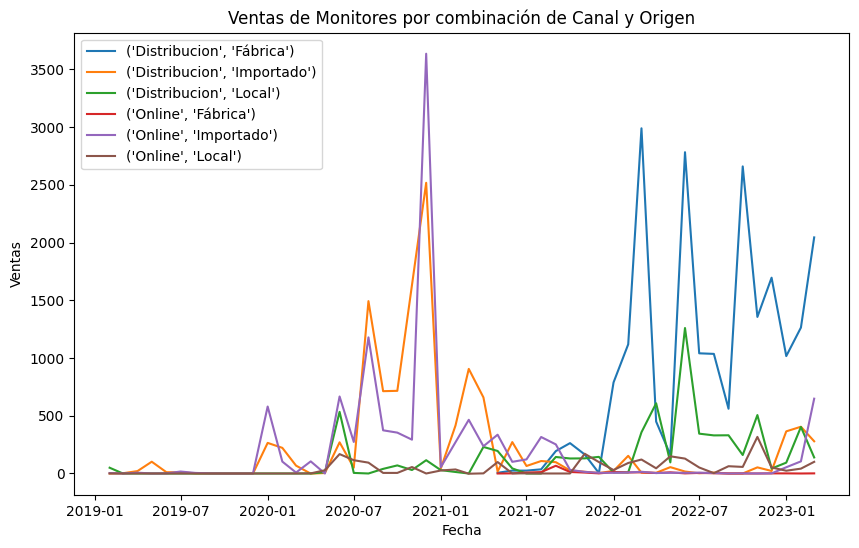

In [ ]:
# generar una tabla pivote con las ventas para cada combinación de Canal y Origen
table = pd.pivot_table(df_final[df_final.RUBRO == "Monitores"], values="Cantidad", index="Fecha",
                       columns=["Canal", "Origen"], aggfunc="sum")

# graficar cada línea en el mismo gráfico
plt.figure(figsize=(10, 6))
for column in table.columns:
    plt.plot(table.index, table[column], label=column)
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.title("Ventas de Monitores por combinación de Canal y Origen")
plt.legend()
plt.show()

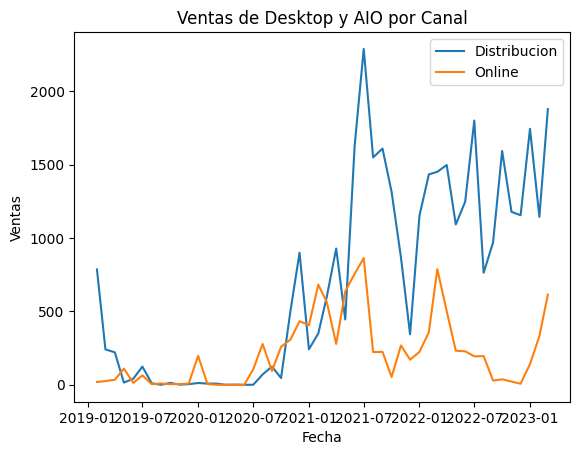

In [ ]:
df_desk = df_final.loc[df_final['RUBRO'] == 'Desktop y AIO'].groupby(['Fecha', 'Canal'])['Cantidad'].sum().reset_index()
canal_1 = df_desk[df_desk['Canal'] == 'Distribucion']
canal_2 = df_desk[df_desk['Canal'] == 'Online']

plt.plot(canal_1['Fecha'], canal_1['Cantidad'], label='Distribucion')
plt.plot(canal_2['Fecha'], canal_2['Cantidad'], label='Online')
plt.title('Ventas de Desktop y AIO por Canal')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

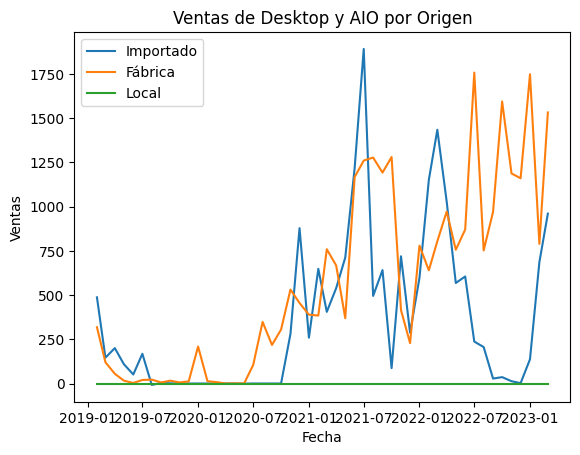

In [ ]:
df_desk = df_final.loc[df_final['RUBRO'] == 'Desktop y AIO'].groupby(['Fecha', 'Origen'])['Cantidad'].sum().reset_index()
origen_1 = df_desk[df_desk['Origen'] == 'Importado']
origen_2 = df_desk[df_desk['Origen'] == 'Fábrica']
origen_3 = df_desk[df_desk['Origen'] == 'Local']

plt.plot(origen_1['Fecha'], origen_1['Cantidad'], label='Importado')
plt.plot(origen_2['Fecha'], origen_2['Cantidad'], label='Fábrica')
plt.plot(origen_3['Fecha'], origen_3['Cantidad'], label='Local')
plt.title('Ventas de Desktop y AIO por Origen')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [ ]:
df_final = df_final.loc[~((df_final['RUBRO'] == 'Desktop y AIO') & (df_final['Origen'] == 'Local'))]

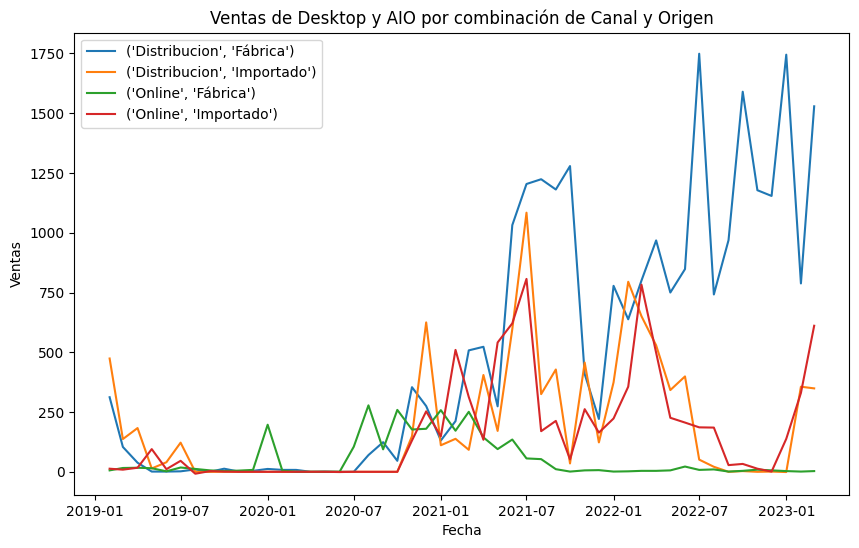

In [ ]:
# generar una tabla pivote con las ventas para cada combinación de Canal y Origen
table = pd.pivot_table(df_final[df_final.RUBRO == "Desktop y AIO"], values="Cantidad", index="Fecha",
                       columns=["Canal", "Origen"], aggfunc="sum")

# graficar cada línea en el mismo gráfico
plt.figure(figsize=(10, 6))
for column in table.columns:
    plt.plot(table.index, table[column], label=column)
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.title("Ventas de Desktop y AIO por combinación de Canal y Origen")
plt.legend()
plt.show()

## Modelado

In [ ]:
from sklearn.model_selection import train_test_split #separacion de dataset para Machine Learning
from sklearn import linear_model #Modelo lineal
from sklearn.tree import DecisionTreeRegressor #Arboles
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree #Para graficar arboles
from sklearn import metrics #accuracy
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
#import tensorflow as tf #Redes
#from tensorflow import keras #Redes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
lista_rubros = df_final['RUBRO'].unique()
print(lista_rubros)

['Memorias' 'Desktop y AIO' 'Monitores' 'Notebooks' 'Impresoras'
 'Celulares' 'Aire Acondicionado' 'Coccion' 'Lavado' 'Television']


Modelo Memorias


In [ ]:
df_memorias = df_final.loc[df_final['RUBRO'] == 'Memorias'].copy()

In [ ]:
df_memorias_st = df_memorias.drop(['RUBRO','Canal','Origen','Unidad.de.Negocio'], axis=1)

In [ ]:
df_memorias = pd.get_dummies(df_memorias, columns=['Unidad.de.Negocio', 'Canal', 'Origen',])

In [ ]:
df_memorias = df_memorias.drop(['RUBRO','Fecha'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_memorias[['Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3']] = scaler.fit_transform(df_memorias[['Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3']])


In [ ]:
# Transformación de la columna de fecha a formato datetime
df_memorias_st['Fecha'] = pd.to_datetime(df_memorias_st['Fecha'])

# Agrupar registros con la misma fecha y sumar las cantidades
df_memorias_st = df_memorias_st.groupby(['Fecha', 'Año', 'Mes', 'Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3', 'Aislamiento', 'Dias_Evento'], as_index=False)['Cantidad'].sum()


In [ ]:
display(df_memorias)

,Año,Mes,Cantidad,Inflacion_1,Inflacion_2,Inflacion_3,Indice_Consumidor_1,Indice_Consumidor_2,Indice_Consumidor_3,Aislamiento,Dias_Evento,Unidad.de.Negocio_Componentes,Canal_Distribucion,Canal_Online,Origen_Importado,Origen_Local
521,2019,2,0.0,0.237288,0.186441,0.288136,0.000000,0.260840,0.000000,0,0,1,1,0,1,0
522,2019,3,163.0,0.389831,0.237288,0.186441,0.265351,0.000000,0.322112,0,0,1,1,0,1,0
523,2019,4,308.0,0.542373,0.389831,0.237288,0.152909,0.265351,0.082894,0,0,1,1,0,1,0
524,2019,5,471.0,0.322034,0.542373,0.389831,0.118285,0.152909,0.326250,0,3,1,1,0,1,0
525,2019,6,150.0,0.271186,0.322034,0.542373,0.304405,0.118285,0.223128,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2022,11,0.0,0.813559,0.796610,0.932203,0.230141,0.369131,0.409555,0,3,1,0,1,0,1
723,2022,12,0.0,0.576271,0.813559,0.796610,0.184996,0.230141,0.421427,0,0,1,0,1,0,1
724,2023,1,0.0,0.610169,0.576271,0.813559,0.253617,0.184996,0.293958,0,0,1,0,1,0,1
725,2023,2,0.0,0.762712,0.610169,0.576271,0.489273,0.253617,0.252556,0,0,1,0,1,0,1


In [ ]:
X=df_memorias.drop(columns=['Cantidad'])
y=df_memorias['Cantidad']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 0)

In [ ]:
y_train

659     467.0
589       0.0
547     464.0
638    3229.0
695       0.0
        ...  
590       0.0
719       0.0
642     671.0
568    3228.0
699       0.0
Name: Cantidad, Length: 160, dtype: float64

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(160, 15)
(160,)
(40, 15)
(40,)


(None, None)

In [ ]:
lr_multiple = linear_model.LinearRegression()
#Entreno el modelo",
lr_multiple.fit(X_train, y_train)

print(lr_multiple.coef_)
print(lr_multiple.intercept_)
print("Accuracy" , lr_multiple.score(X_train, y_train))
print("Accuracy test" , lr_multiple.score(X_test, y_test))

y_pred = lr_multiple.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))

print("RMSE" , rmse)

[ 1.50506717e+02  2.37766786e+01  2.55315926e+02  2.88832787e+02
 -3.53522442e+02 -4.55538635e+01 -2.16044291e+02  6.00564947e+02
 -1.78218145e+01 -1.31991781e+02 -5.68434189e-14  9.28763810e+01
 -9.28763810e+01  4.82657464e+02 -4.82657464e+02]
-303905.5703599976
Accuracy 0.31922975096352935
Accuracy test 0.24239139855749192
RMSE 860.201694340204


In [ ]:

y_pred_train = lr_multiple.predict(X_train)
y_pred_test = lr_multiple.predict(X_test)

def calculate_mape(y_true, y_pred):
    mape = np.zeros_like(y_true)
    non_zero_indices = y_true != 0
    mape[non_zero_indices] = np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    return np.mean(mape)

mape_train = calculate_mape(y_train, y_pred_train)
mape_test = calculate_mape(y_test, y_pred_test)

print("Linear Regression")
print("MAPE (train):", mape_train)
print("MAPE (test):", mape_test)


Linear Regression
MAPE (train): 1.8922796426682855
MAPE (test): 3.1648882011670816


In [ ]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Cantidad   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     5.744
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           4.46e-08
Time:                        14:29:01   Log-Likelihood:                -1308.2
No. Observations:                 160   AIC:                             2642.
Df Residuals:                     147   BIC:                             2682.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Año                             150.5067     89.295      1.685      0.094     -25.961     326.975
Mes                              23.7767     24.168      0.984      0.327     -23.985      71.538
Inflacion_1                     255.3159    501.553      0.509      0.611    -735.870    1246.502
Inflacion_2                     288.8328    652.468      0.443      0.659   -1000.595    1578.261
Inflacion_3                    -353.5224    523.354     -0.675      0.500   -1387.792     680.747
Indice_Consumidor_1             -45.5539    514.937     -0.088      0.930   -1063.190     972.082
Indice_Consumidor_2            -216.0443    543.419     -0.398      0.692   -1289.967     857.878
Indice_Consumidor_3             600.5649    508.796      1.180      0.240    -404.935    1606.065
Aislamiento                     -17.8218     13.717     -1.299      0.196     -44.929       9.286
Dias_Evento                    -131.9918     77.171     -1.710      0.089    -284.499      20.516
Unidad.de.Negocio_Componentes  -1.52e+05   9.01e+04     -1.686      0.094    -3.3e+05    2.62e+04
Canal_Distribucion            -7.588e+04   4.51e+04     -1.684      0.094   -1.65e+05    1.32e+04
Canal_Online                  -7.607e+04   4.51e+04     -1.688      0.094   -1.65e+05     1.3e+04
Origen_Importado              -7.549e+04   4.51e+04     -1.675      0.096   -1.65e+05    1.36e+04
Origen_Local                  -7.646e+04   4.51e+04     -1.697      0.092   -1.66e+05    1.26e+04
==============================================================================
Omnibus:                      113.409   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.515
Skew:                           2.673   Prob(JB):                    7.98e-168
Kurtosis:                      12.320   Cond. No.                     1.79e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.05e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
random = RandomForestRegressor(max_depth=10, n_estimators=300, max_features=1)
random.fit(X_train, y_train)
print("RandomForestRegressor")
print("Accuracy:",random.score(X_train, y_train))
print("Accuracy test:",random.score(X_test, y_test))

RandomForestRegressor
Accuracy: 0.8805197529246749
Accuracy test: 0.21114169785443326


In [ ]:
import numpy as np

y_pred_train = random.predict(X_train)
y_pred_test = random.predict(X_test)

def calculate_mape(y_true, y_pred):
    mape = np.zeros_like(y_true)
    non_zero_indices = y_true != 0
    mape[non_zero_indices] = np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    return np.mean(mape)

mape_train = calculate_mape(y_train, y_pred_train)
mape_test = calculate_mape(y_test, y_pred_test)

print("RandomForestRegressor")
print("MAPE (train):", mape_train)
print("MAPE (test):", mape_test)


RandomForestRegressor
MAPE (train): 0.6372187869853857
MAPE (test): 2.1607690186937174


In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10)
regr = xgbr.fit(X_train,y_train)
r2_train= regr.score(X_train,y_train)
r2_test= regr.score(X_test,y_test)
print("r2_train: ", r2_train)
print("r2_test: ", r2_test)


r2_train:  0.9999999999985952
r2_test:  0.1300466507380863


In [ ]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

def calculate_mape(y_true, y_pred):
    mape = np.zeros_like(y_true)
    non_zero_indices = y_true != 0
    mape[non_zero_indices] = np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    return np.mean(mape)

mape_train = calculate_mape(y_train, y_pred_train)
mape_test = calculate_mape(y_test, y_pred_test)

print("XGBRegressor")
print("MAPE (train):", mape_train)
print("MAPE (test):", mape_test)


XGBRegressor
MAPE (train): 1.390277926253756e-06
MAPE (test): 0.8241095561291762


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.


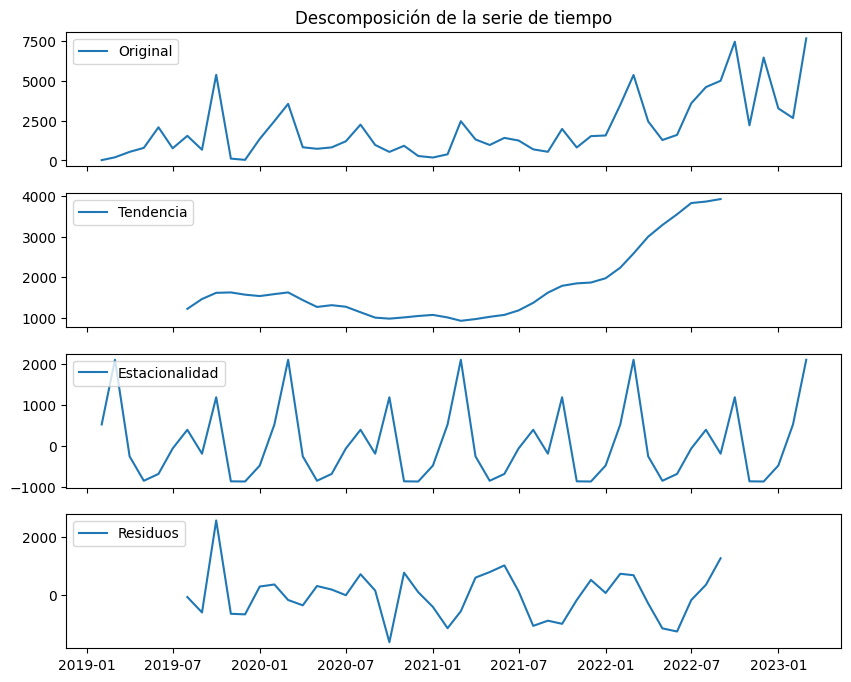

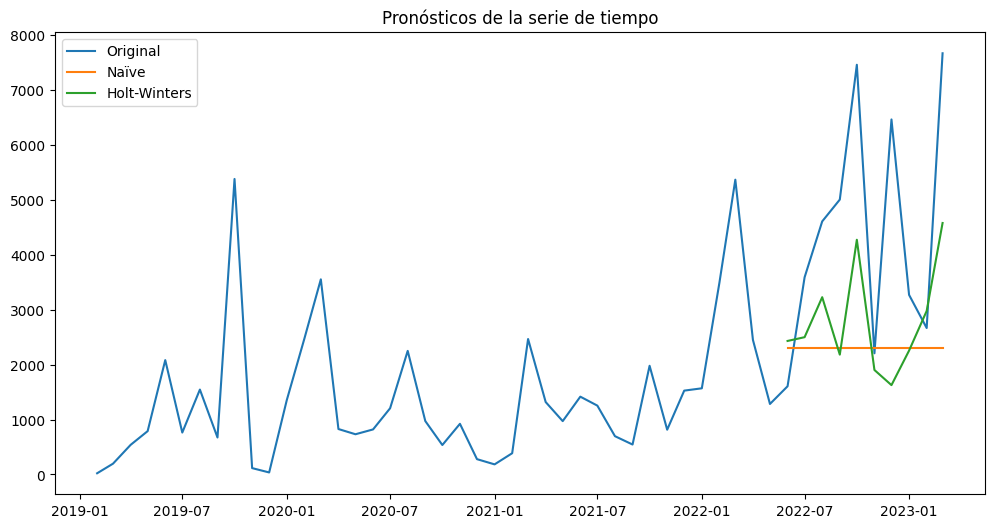

MAPE Holt-Winters: 0.3823684346329464
MAPE Naive: 0.433960105731634


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error


# Creación de un índice temporal para el dataframe
df_memorias_st = df_memorias_st.set_index('Fecha')


# Creación de una serie de tiempo para la variable "Cantidad"
ts_cantidad = df_memorias_st['Cantidad']

# Descomposición de la serie de tiempo en tendencia, estacionalidad y residuos
decomposition = seasonal_decompose(ts_cantidad, period=12)

# Visualización de la descomposición
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))
axes[0].set_title('Descomposición de la serie de tiempo')
axes[0].plot(ts_cantidad, label='Original')
axes[0].legend(loc='upper left')
axes[1].plot(decomposition.trend, label='Tendencia')
axes[1].legend(loc='upper left')
axes[2].plot(decomposition.seasonal,label='Estacionalidad')
axes[2].legend(loc='upper left')
axes[3].plot(decomposition.resid, label='Residuos')
axes[3].legend(loc='upper left')

# Separación del dataset en train y test
train_size = int(len(ts_cantidad) * 0.8)
ts_cantidad_train, ts_cantidad_test = ts_cantidad[0:train_size], ts_cantidad[train_size:len(ts_cantidad)]

# Pronóstico con método Naïve
naive_model = ExponentialSmoothing(ts_cantidad_train, trend=None, seasonal=None)
naive_fit = naive_model.fit()
naive_forecast = naive_fit.forecast(steps=len(ts_cantidad_test))
mape_naive = mean_absolute_percentage_error(df_memorias_st['Cantidad'][train_size:], naive_forecast)

# Pronóstico con método de Holt-Winters
hw_model = ExponentialSmoothing(ts_cantidad_train, trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=len(ts_cantidad_test))
mape_hw = mean_absolute_percentage_error(df_memorias_st['Cantidad'][train_size:], hw_forecast)

# Visualización de los pronósticos
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_memorias_st.index, df_memorias_st['Cantidad'], label='Original')
ax.plot(ts_cantidad_test.index, naive_forecast, label='Naïve')
ax.plot(ts_cantidad_test.index, hw_forecast, label='Holt-Winters')
ax.set_title('Pronósticos de la serie de tiempo')
ax.legend(loc='upper left')
plt.show()

#Resultados de los pronosticos
print("MAPE Holt-Winters:", mape_hw)
print("MAPE Naive:", mape_naive)



Modelo Celulares


In [ ]:
df_celulares = df_final.loc[df_final['RUBRO'] == 'Celulares'].copy()

In [ ]:
df_celulares_general = df_celulares.drop(['RUBRO','Canal','Origen','Unidad.de.Negocio'], axis=1)

In [ ]:
# Transformación de la columna de fecha a formato datetime
df_celulares_general['Fecha'] = pd.to_datetime(df_celulares_general['Fecha'])

# Agrupar registros con la misma fecha y sumar las cantidades
df_celulares_general = df_celulares_general.groupby(['Fecha', 'Año', 'Mes', 'Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3', 'Aislamiento', 'Dias_Evento'], as_index=False)['Cantidad'].sum()


In [ ]:
df_celulares_distribucion = df_celulares.loc[df_celulares['Canal'] == 'Distribucion'].copy()

In [ ]:
df_celulares_online = df_celulares.loc[df_celulares['Canal'] == 'Online'].copy()

In [ ]:
df_celulares = pd.get_dummies(df_celulares, columns=['Unidad.de.Negocio', 'Canal', 'Origen',])

In [ ]:
df_celulares = df_celulares.drop(['RUBRO','Fecha'], axis=1)

In [ ]:
df_celulares_distribucion = df_celulares_distribucion.drop(['Canal','Unidad.de.Negocio','Canal','Origen'], axis=1)

In [ ]:
df_celulares_online = df_celulares_online.drop(['Canal','Unidad.de.Negocio','Canal','Origen'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_celulares[['Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3']] = scaler.fit_transform(df_celulares[['Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3']])


In [ ]:
# Transformación de la columna de fecha a formato datetime
df_celulares_distribucion['Fecha'] = pd.to_datetime(df_celulares_distribucion['Fecha'])

# Agrupar registros con la misma fecha y sumar las cantidades
df_celulares_distribucion = df_celulares_distribucion.groupby(['Fecha', 'Año', 'Mes', 'Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3', 'Aislamiento', 'Dias_Evento'], as_index=False)['Cantidad'].sum()

In [ ]:
# Transformación de la columna de fecha a formato datetime
df_celulares_online['Fecha'] = pd.to_datetime(df_celulares_online['Fecha'])

# Agrupar registros con la misma fecha y sumar las cantidades
df_celulares_online = df_celulares_online.groupby(['Fecha', 'Año', 'Mes', 'Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3', 'Aislamiento', 'Dias_Evento'], as_index=False)['Cantidad'].sum()

In [ ]:
display(df_celulares_distribucion)

,Fecha,Año,Mes,Inflacion_1,Inflacion_2,Inflacion_3,Indice_Consumidor_1,Indice_Consumidor_2,Indice_Consumidor_3,Aislamiento,Dias_Evento,Cantidad
0,2019-02-01,2019,2,0.029,0.026,0.032,33.101078,35.990000,32.100000,0,0,615.0
1,2019-03-01,2019,3,0.038,0.029,0.026,36.039967,33.101078,35.990000,0,0,381.0
2,2019-04-01,2019,4,0.047,0.038,0.029,34.794621,36.039967,33.101078,0,0,304.0
3,2019-05-01,2019,5,0.034,0.047,0.038,34.411144,34.794621,36.039967,0,3,16.0
4,2019-06-01,2019,6,0.031,0.034,0.047,36.472500,34.411144,34.794621,0,0,0.0
5,2019-07-01,2019,7,0.027,0.031,0.034,40.574234,36.472500,34.411144,0,0,692.0
6,2019-08-01,2019,8,0.022,0.027,0.031,44.176544,40.574234,36.472500,0,0,0.0
7,2019-09-01,2019,9,0.040,0.022,0.027,41.862835,44.176544,40.574234,0,0,24.0
8,2019-10-01,2019,10,0.059,0.040,0.022,42.093285,41.862835,44.176544,0,0,0.0
9,2019-11-01,2019,11,0.033,0.059,0.040,43.772411,42.093285,41.862835,0,4,248.0


In [ ]:
X=df_celulares.drop(columns=['Cantidad'])
y=df_celulares['Cantidad']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 0)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(120, 15)
(120,)
(30, 15)
(30,)


(None, None)

In [ ]:
lr_multiple = linear_model.LinearRegression()
#Entreno el modelo",
lr_multiple.fit(X_train, y_train)

print(lr_multiple.coef_)
print(lr_multiple.intercept_)
print("Accuracy" , lr_multiple.score(X_train, y_train))
print("Accuracy test" , lr_multiple.score(X_test, y_test))

y_pred = lr_multiple.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))

print("RMSE" , rmse)

[  61.17972951   12.34967977   -7.76084355    2.47840097  241.41026746
  -72.82613799   -2.45855484  -41.4586806    -6.50643736   -6.64926058
    0.         -139.0992916   139.0992916   -59.38507979   59.38507979]
-123488.69208968697
Accuracy 0.3957319726649505
Accuracy test -2.632423633028814
RMSE 292.59531776211287


In [ ]:

y_pred_train = lr_multiple.predict(X_train)
y_pred_test = lr_multiple.predict(X_test)

def calculate_mape(y_true, y_pred):
    mape = np.zeros_like(y_true)
    non_zero_indices = y_true != 0
    mape[non_zero_indices] = np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    return np.mean(mape)

mape_train = calculate_mape(y_train, y_pred_train)
mape_test = calculate_mape(y_test, y_pred_test)

print("Linear Regression")
print("MAPE (train):", mape_train)
print("MAPE (test):", mape_test)


Linear Regression
MAPE (train): 15.31078842868372
MAPE (test): 19.97774386595546


In [ ]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Cantidad   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     5.839
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.06e-07
Time:                        14:29:05   Log-Likelihood:                -851.73
No. Observations:                 120   AIC:                             1729.
Df Residuals:                     107   BIC:                             1766.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Año                              61.1797     34.632      1.767      0.080      -7.474     129.834
Mes                              12.3497      9.688      1.275      0.205      -6.857      31.556
Inflacion_1                      -7.7608    218.937     -0.035      0.972    -441.778     426.257
Inflacion_2                       2.4784    255.289      0.010      0.992    -503.603     508.560
Inflacion_3                     241.4103    217.268      1.111      0.269    -189.298     672.118
Indice_Consumidor_1             -72.8261    197.514     -0.369      0.713    -464.376     318.723
Indice_Consumidor_2              -2.4586    224.933     -0.011      0.991    -448.361     443.444
Indice_Consumidor_3             -41.4587    203.608     -0.204      0.839    -445.088     362.170
Aislamiento                      -6.5064      5.887     -1.105      0.272     -18.177       5.164
Dias_Evento                      -6.6493     28.524     -0.233      0.816     -63.195      49.896
Unidad.de.Negocio__ Celulares -6.174e+04    3.5e+04     -1.766      0.080   -1.31e+05    7556.136
Canal_Distribucion            -3.101e+04   1.75e+04     -1.774      0.079   -6.57e+04    3639.646
Canal_Online                  -3.073e+04   1.75e+04     -1.758      0.082   -6.54e+04    3916.630
Origen_Importado              -3.093e+04   1.75e+04     -1.770      0.080   -6.56e+04    3717.628
Origen_Local                  -3.081e+04   1.75e+04     -1.763      0.081   -6.55e+04    3838.656
==============================================================================
Omnibus:                       40.997   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.146
Skew:                           1.448   Prob(JB):                     1.45e-18
Kurtosis:                       5.836   Cond. No.                     1.93e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
random = RandomForestRegressor(max_depth=10, n_estimators=300, max_features=1)
random.fit(X_train, y_train)
print("RandomForestRegressor")
print("Accuracy:",random.score(X_train, y_train))
print("Accuracy test:",random.score(X_test, y_test))

RandomForestRegressor
Accuracy: 0.8993179683498139
Accuracy test: -0.6773004212043376


In [ ]:
y_pred_train = random.predict(X_train)
y_pred_test = random.predict(X_test)

def calculate_mape(y_true, y_pred):
    mape = np.zeros_like(y_true)
    non_zero_indices = y_true != 0
    mape[non_zero_indices] = np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    return np.mean(mape)

mape_train = calculate_mape(y_train, y_pred_train)
mape_test = calculate_mape(y_test, y_pred_test)

print("RandomForestRegressor")
print("MAPE (train):", mape_train)
print("MAPE (test):", mape_test)

RandomForestRegressor
MAPE (train): 3.6407228075449307
MAPE (test): 11.584331524700902


In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10)
regr = xgbr.fit(X_train,y_train)
r2_train= regr.score(X_train,y_train)
r2_test= regr.score(X_test,y_test)
print("r2_train: ", r2_train)
print("r2_test: ", r2_test)

r2_train:  0.9999999999773745
r2_test:  0.2282860533812272


In [ ]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

def calculate_mape(y_true, y_pred):
    mape = np.zeros_like(y_true)
    non_zero_indices = y_true != 0
    mape[non_zero_indices] = np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    return np.mean(mape)

mape_train = calculate_mape(y_train, y_pred_train)
mape_test = calculate_mape(y_test, y_pred_test)

print("XGBRegressor")
print("MAPE (train):", mape_train)
print("MAPE (test):", mape_test)

XGBRegressor
MAPE (train): 7.507808957601962e-05
MAPE (test): 6.662604533706394


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.


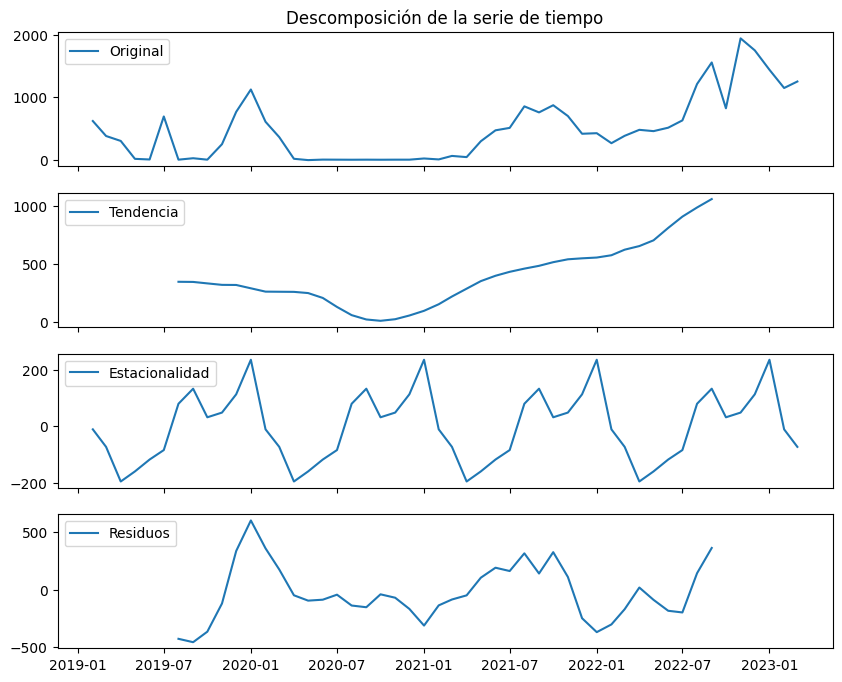

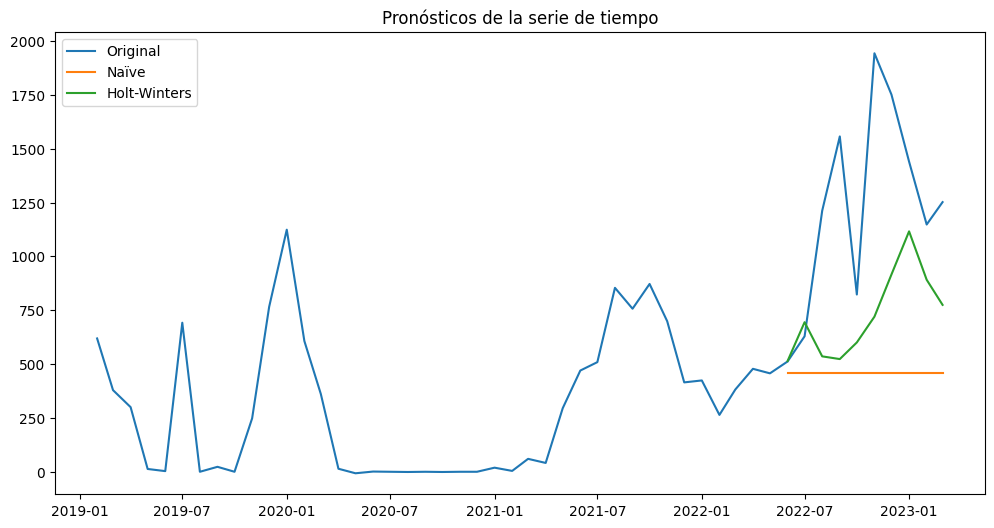

MAPE Holt-Winters: 0.35360834482754655
MAPE Naive: 0.557200071532272


In [ ]:
# Creación de un índice temporal para el dataframe
df_celulares_general = df_celulares_general.set_index('Fecha')


# Creación de una serie de tiempo para la variable "Cantidad"
ts_cantidad = df_celulares_general['Cantidad']

# Descomposición de la serie de tiempo en tendencia, estacionalidad y residuos
decomposition = seasonal_decompose(ts_cantidad, period=12)

# Visualización de la descomposición
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))
axes[0].set_title('Descomposición de la serie de tiempo')
axes[0].plot(ts_cantidad, label='Original')
axes[0].legend(loc='upper left')
axes[1].plot(decomposition.trend, label='Tendencia')
axes[1].legend(loc='upper left')
axes[2].plot(decomposition.seasonal,label='Estacionalidad')
axes[2].legend(loc='upper left')
axes[3].plot(decomposition.resid, label='Residuos')
axes[3].legend(loc='upper left')

# Separación del dataset en train y test
train_size = int(len(ts_cantidad) * 0.8)
ts_cantidad_train, ts_cantidad_test = ts_cantidad[0:train_size], ts_cantidad[train_size:len(ts_cantidad)]

# Pronóstico con método Naïve
naive_model = ExponentialSmoothing(ts_cantidad_train, trend=None, seasonal=None)
naive_fit = naive_model.fit()
naive_forecast = naive_fit.forecast(steps=len(ts_cantidad_test))
mape_naive = mean_absolute_percentage_error(df_celulares_general['Cantidad'][train_size:], naive_forecast)

# Pronóstico con método de Holt-Winters
hw_model = ExponentialSmoothing(ts_cantidad_train, trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=len(ts_cantidad_test))
mape_hw = mean_absolute_percentage_error(df_celulares_general['Cantidad'][train_size:], hw_forecast)

# Visualización de los pronósticos
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_celulares_general.index, df_celulares_general['Cantidad'], label='Original')
ax.plot(ts_cantidad_test.index, naive_forecast, label='Naïve')
ax.plot(ts_cantidad_test.index, hw_forecast, label='Holt-Winters')
ax.set_title('Pronósticos de la serie de tiempo')
ax.legend(loc='upper left')
plt.show()

#Resultados de los pronosticos
print("MAPE Holt-Winters:", mape_hw)
print("MAPE Naive:", mape_naive)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.


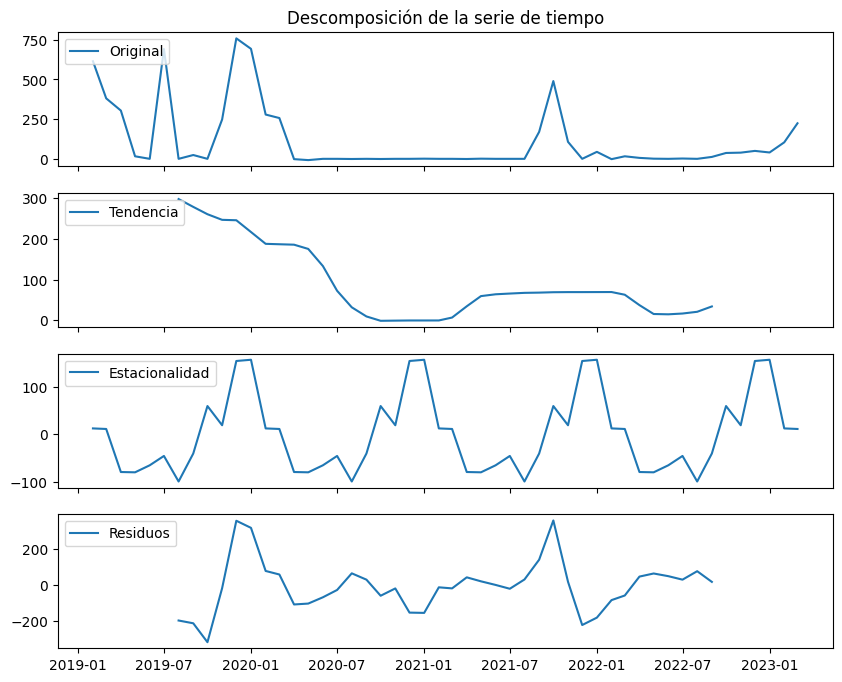

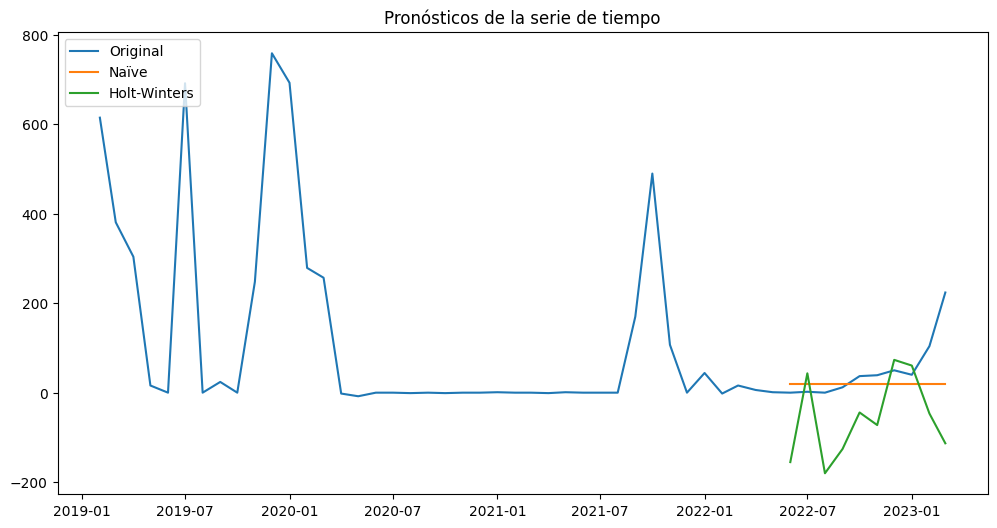

MAPE Holt-Winters: 1.511301154260197e+17
MAPE Naive: 1.700296186513808e+16


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error


# Creación de un índice temporal para el dataframe
df_celulares_distribucion = df_celulares_distribucion.set_index('Fecha')


# Creación de una serie de tiempo para la variable "Cantidad"
ts_cantidad = df_celulares_distribucion['Cantidad']

# Descomposición de la serie de tiempo en tendencia, estacionalidad y residuos
decomposition = seasonal_decompose(ts_cantidad, period=12)

# Visualización de la descomposición
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))
axes[0].set_title('Descomposición de la serie de tiempo')
axes[0].plot(ts_cantidad, label='Original')
axes[0].legend(loc='upper left')
axes[1].plot(decomposition.trend, label='Tendencia')
axes[1].legend(loc='upper left')
axes[2].plot(decomposition.seasonal,label='Estacionalidad')
axes[2].legend(loc='upper left')
axes[3].plot(decomposition.resid, label='Residuos')
axes[3].legend(loc='upper left')

# Separación del dataset en train y test
train_size = int(len(ts_cantidad) * 0.8)
ts_cantidad_train, ts_cantidad_test = ts_cantidad[0:train_size], ts_cantidad[train_size:len(ts_cantidad)]

# Pronóstico con método Naïve
naive_model = ExponentialSmoothing(ts_cantidad_train, trend=None, seasonal=None)
naive_fit = naive_model.fit()
naive_forecast = naive_fit.forecast(steps=len(ts_cantidad_test))
mape_naive = mean_absolute_percentage_error(df_celulares_distribucion['Cantidad'][train_size:], naive_forecast)

# Pronóstico con método de Holt-Winters
hw_model = ExponentialSmoothing(ts_cantidad_train, trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=len(ts_cantidad_test))
mape_hw = mean_absolute_percentage_error(df_celulares_distribucion['Cantidad'][train_size:], hw_forecast)

# Visualización de los pronósticos
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_celulares_distribucion.index, df_celulares_distribucion['Cantidad'], label='Original')
ax.plot(ts_cantidad_test.index, naive_forecast, label='Naïve')
ax.plot(ts_cantidad_test.index, hw_forecast, label='Holt-Winters')
ax.set_title('Pronósticos de la serie de tiempo')
ax.legend(loc='upper left')
plt.show()

#Resultados de los pronosticos
print("MAPE Holt-Winters:", mape_hw)
print("MAPE Naive:", mape_naive)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.


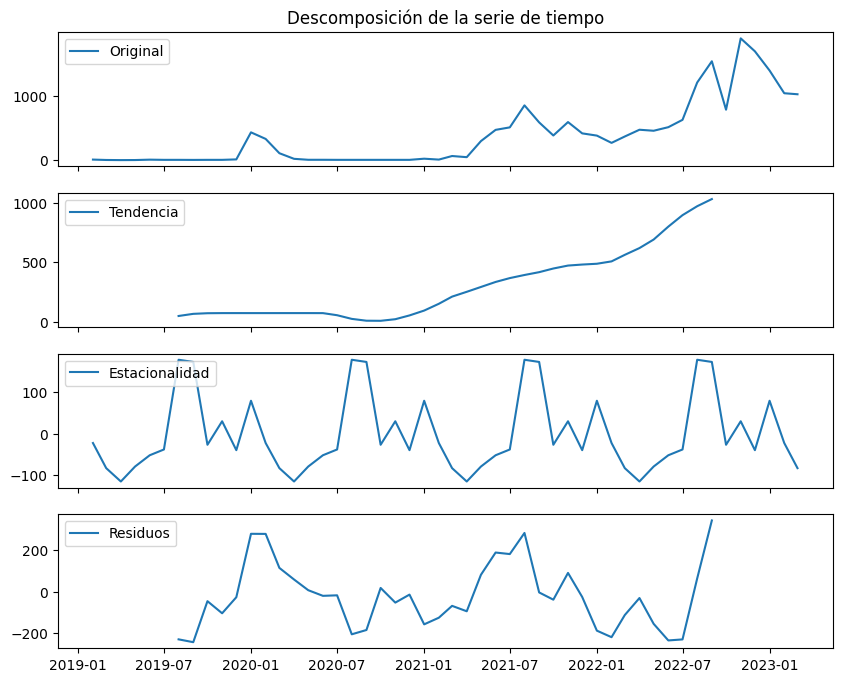

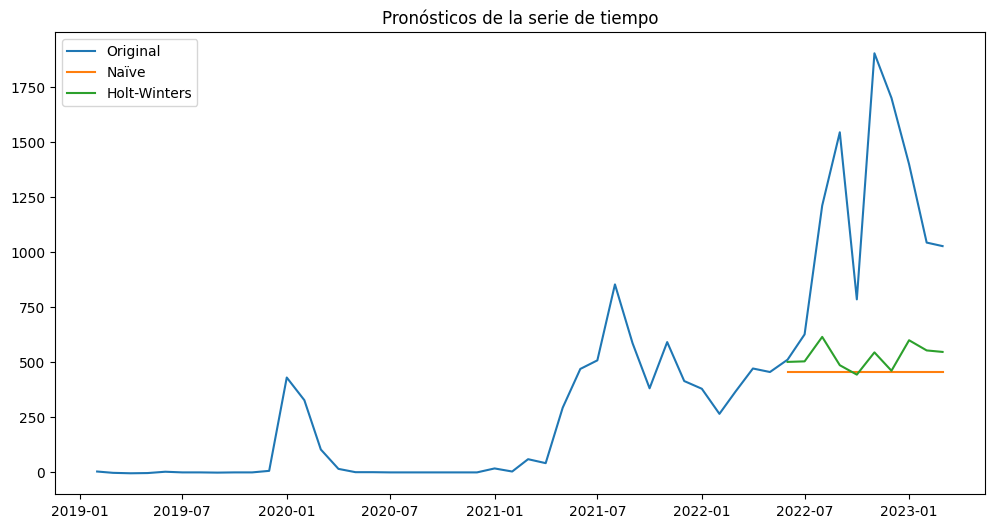

MAPE Holt-Winters: 0.4777262981709557
MAPE Naive: 0.5412206760616107


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error


# Creación de un índice temporal para el dataframe
df_celulares_online = df_celulares_online.set_index('Fecha')


# Creación de una serie de tiempo para la variable "Cantidad"
ts_cantidad = df_celulares_online['Cantidad']

# Descomposición de la serie de tiempo en tendencia, estacionalidad y residuos
decomposition = seasonal_decompose(ts_cantidad, period=12)

# Visualización de la descomposición
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))
axes[0].set_title('Descomposición de la serie de tiempo')
axes[0].plot(ts_cantidad, label='Original')
axes[0].legend(loc='upper left')
axes[1].plot(decomposition.trend, label='Tendencia')
axes[1].legend(loc='upper left')
axes[2].plot(decomposition.seasonal,label='Estacionalidad')
axes[2].legend(loc='upper left')
axes[3].plot(decomposition.resid, label='Residuos')
axes[3].legend(loc='upper left')

# Separación del dataset en train y test
train_size = int(len(ts_cantidad) * 0.8)
ts_cantidad_train, ts_cantidad_test = ts_cantidad[0:train_size], ts_cantidad[train_size:len(ts_cantidad)]

# Pronóstico con método Naïve
naive_model = ExponentialSmoothing(ts_cantidad_train, trend=None, seasonal=None)
naive_fit = naive_model.fit()
naive_forecast = naive_fit.forecast(steps=len(ts_cantidad_test))
mape_naive = mean_absolute_percentage_error(df_celulares_online['Cantidad'][train_size:], naive_forecast)

# Pronóstico con método de Holt-Winters
hw_model = ExponentialSmoothing(ts_cantidad_train, trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=len(ts_cantidad_test))
mape_hw = mean_absolute_percentage_error(df_celulares_online['Cantidad'][train_size:], hw_forecast)

# Visualización de los pronósticos
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_celulares_online.index, df_celulares_online['Cantidad'], label='Original')
ax.plot(ts_cantidad_test.index, naive_forecast, label='Naïve')
ax.plot(ts_cantidad_test.index, hw_forecast, label='Holt-Winters')
ax.set_title('Pronósticos de la serie de tiempo')
ax.legend(loc='upper left')
plt.show()

#Resultados de los pronosticos
print("MAPE Holt-Winters:", mape_hw)
print("MAPE Naive:", mape_naive)


Modelo Television

In [ ]:
df_television = df_final.loc[(df_final['RUBRO'] == 'Television') & (df_final['Unidad.de.Negocio'] != 'IT Accesorios')]

In [ ]:
df_television_st = df_television.drop(['RUBRO','Canal','Origen','Unidad.de.Negocio'], axis=1)

In [ ]:
df_television = pd.get_dummies(df_television, columns=['Unidad.de.Negocio', 'Canal', 'Origen'])

In [ ]:
df_television = df_television.drop(['RUBRO','Fecha'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_television[['Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3']] = scaler.fit_transform(df_television[['Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3']])


In [ ]:
# Transformación de la columna de fecha a formato datetime
df_television_st['Fecha'] = pd.to_datetime(df_television_st['Fecha'])

# Agrupar registros con la misma fecha y sumar las cantidades
df_television_st = df_television_st.groupby(['Fecha', 'Año', 'Mes', 'Inflacion_1', 'Inflacion_2', 'Inflacion_3', 'Indice_Consumidor_1', 'Indice_Consumidor_2', 'Indice_Consumidor_3', 'Aislamiento', 'Dias_Evento'], as_index=False)['Cantidad'].sum()

In [ ]:
df_television

,Año,Mes,Cantidad,Inflacion_1,Inflacion_2,Inflacion_3,Indice_Consumidor_1,Indice_Consumidor_2,Indice_Consumidor_3,Aislamiento,Dias_Evento,Unidad.de.Negocio__ Television,Canal_Distribucion,Canal_Online,Origen_Importado,Origen_Local
5513,2019,2,3.0,0.237288,0.186441,0.288136,0.000000,0.260840,0.000000,0,0,1,1,0,0,1
5514,2019,3,67.0,0.389831,0.237288,0.186441,0.265351,0.000000,0.322112,0,0,1,1,0,0,1
5515,2019,4,127.0,0.542373,0.389831,0.237288,0.152909,0.265351,0.082894,0,0,1,1,0,0,1
5516,2019,5,25.0,0.322034,0.542373,0.389831,0.118285,0.152909,0.326250,0,3,1,1,0,0,1
5517,2019,6,2.0,0.271186,0.322034,0.542373,0.304405,0.118285,0.223128,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,2022,11,3595.0,0.813559,0.796610,0.932203,0.230141,0.369131,0.409555,0,3,1,0,1,0,1
5663,2022,12,1385.0,0.576271,0.813559,0.796610,0.184996,0.230141,0.421427,0,0,1,0,1,0,1
5664,2023,1,2096.0,0.610169,0.576271,0.813559,0.253617,0.184996,0.293958,0,0,1,0,1,0,1
5665,2023,2,2501.0,0.762712,0.610169,0.576271,0.489273,0.253617,0.252556,0,0,1,0,1,0,1


In [ ]:
X=df_television.drop(columns=['Cantidad'])
y=df_television['Cantidad']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state = 0)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(116, 15)
(116,)
(30, 15)
(30,)


(None, None)

In [ ]:
lr_multiple = linear_model.LinearRegression()
#Entreno el modelo",
lr_multiple.fit(X_train, y_train)

print(lr_multiple.coef_)
print(lr_multiple.intercept_)
print("Accuracy" , lr_multiple.score(X_train, y_train))
print("Accuracy test" , lr_multiple.score(X_test, y_test))

y_pred = lr_multiple.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))

print("RMSE" , rmse)

[ 175.94507055   14.40543346  -47.65451575  208.37758498 -185.99337837
 -155.50523023  194.82876229 -136.62377129  -14.62292042   57.91718706
    0.         -351.93919271  351.93919271 -385.16324588  385.16324588]
-355475.4890999361
Accuracy 0.47074767300418674
Accuracy test 0.4806978578660164
RMSE 471.7707868352757


In [ ]:
y_pred_train = lr_multiple.predict(X_train)
y_pred_test = lr_multiple.predict(X_test)

def calculate_mape(y_true, y_pred):
    mape = np.zeros_like(y_true)
    non_zero_indices = y_true != 0
    mape[non_zero_indices] = np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    return np.mean(mape)

mape_train = calculate_mape(y_train, y_pred_train)
mape_test = calculate_mape(y_test, y_pred_test)

print("Linear Regression")
print("MAPE (train):", mape_train)
print("MAPE (test):", mape_test)

Linear Regression
MAPE (train): 17.292896552650287
MAPE (test): 16.74587297874879


In [ ]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Cantidad   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     7.635
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           6.06e-10
Time:                        14:29:12   Log-Likelihood:                -878.75
No. Observations:                 116   AIC:                             1784.
Df Residuals:                     103   BIC:                             1819.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Año                              175.9451     58.994      2.982      0.004      58.944     292.946
Mes                               14.4054     16.434      0.877      0.383     -18.187      46.998
Inflacion_1                      -47.6545    351.867     -0.135      0.893    -745.500     650.191
Inflacion_2                      208.3776    425.963      0.489      0.626    -636.419    1053.175
Inflacion_3                     -185.9934    341.490     -0.545      0.587    -863.258     491.272
Indice_Consumidor_1             -155.5052    352.682     -0.441      0.660    -854.966     543.956
Indice_Consumidor_2              194.8288    393.760      0.495      0.622    -586.102     975.759
Indice_Consumidor_3             -136.6238    353.331     -0.387      0.700    -837.372     564.124
Aislamiento                      -14.6229      9.552     -1.531      0.129     -33.568       4.322
Dias_Evento                       57.9172     48.164      1.202      0.232     -37.605     153.440
Unidad.de.Negocio__ Television -1.777e+05   5.96e+04     -2.984      0.004   -2.96e+05   -5.96e+04
Canal_Distribucion             -8.922e+04   2.98e+04     -2.996      0.003   -1.48e+05   -3.02e+04
Canal_Online                   -8.852e+04   2.98e+04     -2.972      0.004   -1.48e+05   -2.95e+04
Origen_Importado               -8.925e+04   2.98e+04     -2.997      0.003   -1.48e+05   -3.02e+04
Origen_Local                   -8.848e+04   2.98e+04     -2.971      0.004   -1.48e+05   -2.94e+04
==============================================================================
Omnibus:                       56.634   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.457
Skew:                           1.720   Prob(JB):                     5.42e-46
Kurtosis:                       8.594   Cond. No.                     1.82e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
random = RandomForestRegressor(max_depth=10, n_estimators=300, max_features=1)
random.fit(X_train, y_train)
# Realizar validación cruzada con 5 pliegues
scores = cross_val_score(random, X_train, y_train, cv=5)

# Imprimir resultados de validación cruzada
print("RandomForestRegressor")
print("Cross validation scores:", scores)
print("Average cross validation score:", scores.mean())

RandomForestRegressor
Cross validation scores: [-0.42014387 -0.24040598  0.41503532  0.28440123  0.2900181 ]
Average cross validation score: 0.06578095869557705


In [ ]:
y_pred_train = random.predict(X_train)
y_pred_test = random.predict(X_test)

def calculate_mape(y_true, y_pred):
    mape = np.zeros_like(y_true)
    non_zero_indices = y_true != 0
    mape[non_zero_indices] = np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    return np.mean(mape)

mape_train = calculate_mape(y_train, y_pred_train)
mape_test = calculate_mape(y_test, y_pred_test)

print("RandomForestRegressor")
print("MAPE (train):", mape_train)
print("MAPE (test):", mape_test)

RandomForestRegressor
MAPE (train): 3.557203524628835
MAPE (test): 8.514944883962965


In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10)
regr = xgbr.fit(X_train,y_train)
r2_train= regr.score(X_train,y_train)
r2_test= regr.score(X_test,y_test)
print("r2_train: ", r2_train)
print("r2_test: ", r2_test)

r2_train:  0.9999999999955488
r2_test:  0.552108409918647


In [ ]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

def calculate_mape(y_true, y_pred):
    mape = np.zeros_like(y_true)
    non_zero_indices = y_true != 0
    mape[non_zero_indices] = np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])
    return np.mean(mape)

mape_train = calculate_mape(y_train, y_pred_train)
mape_test = calculate_mape(y_test, y_pred_test)

print("XGBRegressor")
print("MAPE (train):", mape_train)
print("MAPE (test):", mape_test)

XGBRegressor
MAPE (train): 2.268938290293811e-05
MAPE (test): 4.784068620646822


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.


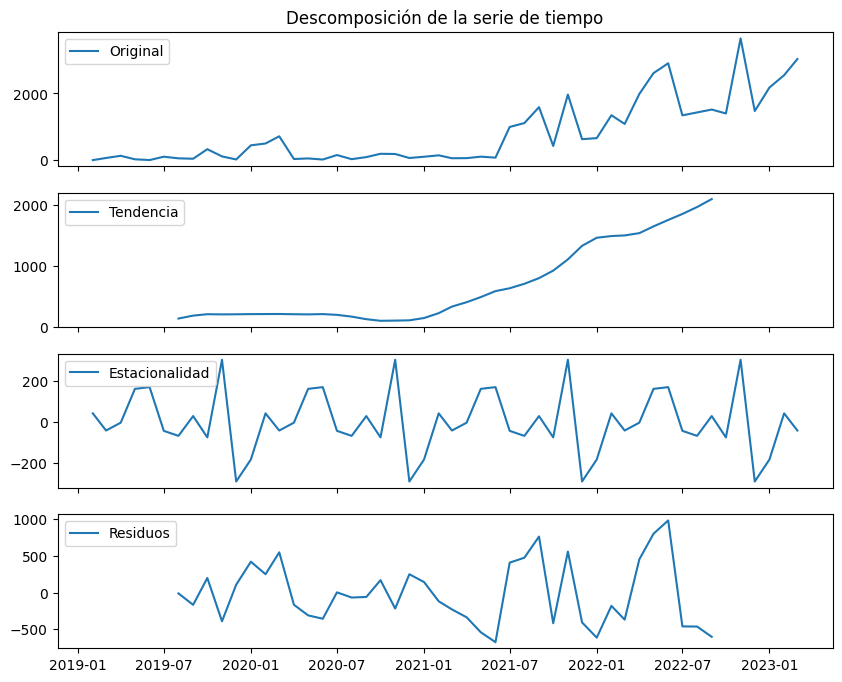

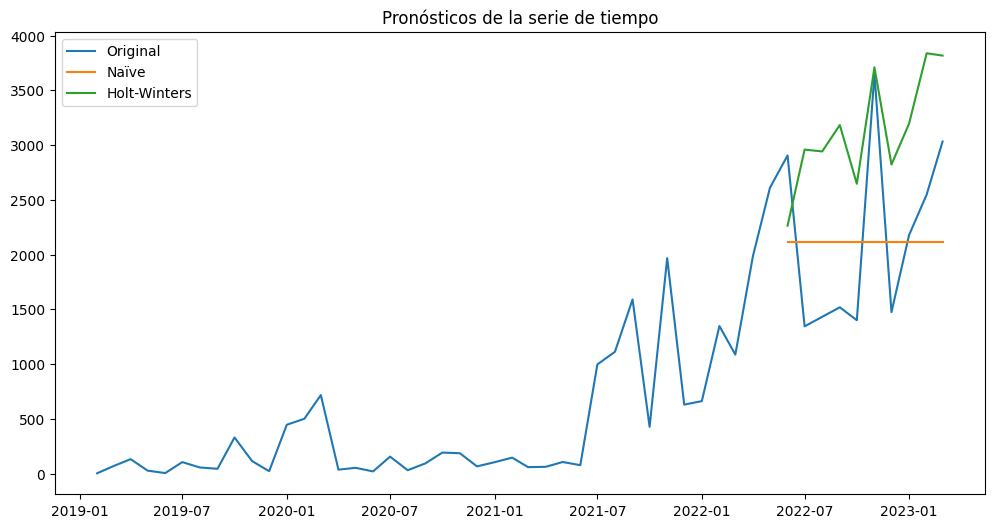

MAPE Holt-Winters: 0.6623491702432804
MAPE Naive: 0.3585206023225567


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error


# Creación de un índice temporal para el dataframe
df_television_st = df_television_st.set_index('Fecha')


# Creación de una serie de tiempo para la variable "Cantidad"
ts_cantidad = df_television_st['Cantidad']

# Descomposición de la serie de tiempo en tendencia, estacionalidad y residuos
decomposition = seasonal_decompose(ts_cantidad, period=12)

# Visualización de la descomposición
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))
axes[0].set_title('Descomposición de la serie de tiempo')
axes[0].plot(ts_cantidad, label='Original')
axes[0].legend(loc='upper left')
axes[1].plot(decomposition.trend, label='Tendencia')
axes[1].legend(loc='upper left')
axes[2].plot(decomposition.seasonal,label='Estacionalidad')
axes[2].legend(loc='upper left')
axes[3].plot(decomposition.resid, label='Residuos')
axes[3].legend(loc='upper left')

# Separación del dataset en train y test
train_size = int(len(ts_cantidad) * 0.8)
ts_cantidad_train, ts_cantidad_test = ts_cantidad[0:train_size], ts_cantidad[train_size:len(ts_cantidad)]

# Pronóstico con método Naïve
naive_model = ExponentialSmoothing(ts_cantidad_train, trend=None, seasonal=None)
naive_fit = naive_model.fit()
naive_forecast = naive_fit.forecast(steps=len(ts_cantidad_test))
mape_naive = mean_absolute_percentage_error(df_television_st['Cantidad'][train_size:], naive_forecast)

# Pronóstico con método de Holt-Winters
hw_model = ExponentialSmoothing(ts_cantidad_train, trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=len(ts_cantidad_test))
mape_hw = mean_absolute_percentage_error(df_television_st['Cantidad'][train_size:], hw_forecast)

# Visualización de los pronósticos
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_television_st.index, df_television_st['Cantidad'], label='Original')
ax.plot(ts_cantidad_test.index, naive_forecast, label='Naïve')
ax.plot(ts_cantidad_test.index, hw_forecast, label='Holt-Winters')
ax.set_title('Pronósticos de la serie de tiempo')
ax.legend(loc='upper left')
plt.show()

#Resultados de los pronosticos
print("MAPE Holt-Winters:", mape_hw)
print("MAPE Naive:", mape_naive)

In [ ]:
df_television_st

,Año,Mes,Inflacion_1,Inflacion_2,Inflacion_3,Indice_Consumidor_1,Indice_Consumidor_2,Indice_Consumidor_3,Aislamiento,Dias_Evento,Cantidad
Fecha,,,,,,,,,,,
2019-02-01,2019,2,0.029,0.026,0.032,33.101078,35.990000,32.100000,0,0,3.0
2019-03-01,2019,3,0.038,0.029,0.026,36.039967,33.101078,35.990000,0,0,67.0
2019-04-01,2019,4,0.047,0.038,0.029,34.794621,36.039967,33.101078,0,0,132.0
2019-05-01,2019,5,0.034,0.047,0.038,34.411144,34.794621,36.039967,0,3,27.0
2019-06-01,2019,6,0.031,0.034,0.047,36.472500,34.411144,34.794621,0,0,5.0
2019-07-01,2019,7,0.027,0.031,0.034,40.574234,36.472500,34.411144,0,0,105.0
2019-08-01,2019,8,0.022,0.027,0.031,44.176544,40.574234,36.472500,0,0,56.0
2019-09-01,2019,9,0.040,0.022,0.027,41.862835,44.176544,40.574234,0,0,44.0
2019-10-01,2019,10,0.059,0.040,0.022,42.093285,41.862835,44.176544,0,0,330.0


In [ ]:
df_notebooks = df_final.loc[df_final['RUBRO'] == 'Notebooks'].copy()

In [ ]:
from google.colab import files
#df is a pandas dataframe
df
df_notebooks.to_csv('dataNote.csv')
files.download('dataNote.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_final.to_csv('dfFinal.csv')
files.download('dfFinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

TypeError: ignored

In [ ]:
note = pd.read_csv("results.csv")
note

In [ ]:
# Visualización de los pronósticos
note['Fecha'] = pd.to_datetime(note['Fecha'], format='%Y-%m-%d')
note = note.set_index('Fecha')
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(note.index, note['Real'], label='Real')
ax.plot(note.index, note['distri1'], label='distri1')
ax.set_title('Pronósticos de la serie de tiempo')
ax.legend(loc='upper left')
plt.show()

In [ ]:
# Visualización de los pronósticos

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(note.index, note['Real'], label='Real')
ax.plot(note.index, note['distri2'], label='distri2')
ax.set_title('Pronósticos de la serie de tiempo')
ax.legend(loc='upper left')
plt.show()


In [ ]:
# Visualización de los pronósticos

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(note.index, note['Real'], label='Real')
ax.plot(note.index, note['online'], label='online')
ax.set_title('Pronósticos de la serie de tiempo')
ax.legend(loc='upper left')
plt.show()


In [ ]:
# Visualización de los pronósticos

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(note.index, note['Real'], label='Real')
ax.plot(note.index, note['completo'], label='completo')
ax.set_title('Pronósticos de la serie de tiempo')
ax.legend(loc='upper left')
plt.show()